In [128]:
import pandas as pd
import numpy  as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report,make_scorer,roc_curve, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, f_regression, RFECV, f_classif, chi2
from tqdm import tqdm

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
data = pd.read_csv('train.csv', delimiter =';', decimal= ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79155 entries, 0 to 79154
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUSTOMER_ID                    79155 non-null  int64  
 1   APPLICATION_ID                 79155 non-null  float64
 2   DEFAULT_FLAG                   79155 non-null  int64  
 3   APPLICATION_DATE               79155 non-null  object 
 4   APPLICATION_HOUR               79155 non-null  object 
 5   APPLICATION_WEEKDAY            79155 non-null  int64  
 6   APPLICATION_MONTH              79155 non-null  int64  
 7   APPLICATION_YEAR               79155 non-null  int64  
 8   PRODUCT_GROUP                  79155 non-null  object 
 9   LOAN_PERIOD                    79155 non-null  int64  
 10  CREDIT_AMOUNT                  79155 non-null  int64  
 11  CUSTOMER_TYPE                  79155 non-null  object 
 12  COOP_PERIOD                    79155 non-null 

In [88]:
variable_decription = pd.read_excel('Variable description.xlsx')
variable_decription

NAME  \
0                     CUSTOMER_ID   
1                  APPLICATION_ID   
2                    DEFAULT_FLAG   
3                APPLICATION_DATE   
4                APPLICATION_HOUR   
5             APPLICATION_WEEKDAY   
6               APPLICATION_MONTH   
7                APPLICATION_YEAR   
8                   PRODUCT_GROUP   
9                     LOAN_PERIOD   
10                  CREDIT_AMOUNT   
11                  CUSTOMER_TYPE   
12                    COOP_PERIOD   
13             CREDIT_COOP_PERIOD   
14                            AGE   
15                      AGE_BANDS   
16                      EDUCATION   
17                 MARITAL_STATUS   
18         SPOUSE_PROPERTY_STATUS   
19                      OWNERSHIP   
20       NUMBER_OF_FAMILY_MEMBERS   
21  MAIL_ADDR_SAME_AS_RESIDENTIAL   
22                   EMAIL_DOMAIN   
23             EMAIL_NAME_SURNAME   
24              MARKETING_CONSENT   
25                       EMP_TYPE   
26                      SENIORITY   
27    CUSTOMER_RUNNING_A_BUSINESS   
28      REMUNERATION_PAID_BY_CASH   
29       REMUNERATION_PAID_TO_ING   
30                DECLARED_INCOME   
31                      INCOME_3M   
32           DECLARED_EXPEDITURES   
33                     NO_INFLOWS   
34             NO_NONCASH_CHARGES   
35                NO_CASH_CHARGES   
36                 SAVING_BALANCE   
37                 CREDIT_BALANCE   
38        CREDIT_BALANCE_TO_LIMIT   
39                     DUE_AMOUNT   
40                            DPD   
41                DPD_FALL_IN_12M   
42          BIK_NUM_REQ_TOTAL_LZ3   
43       BIK_NUM_REQ_TOTAL_LZ4_12   
44                        BIK_GRP   
45        BIK_ACC_NUM_TOTAL_CLOSE   
46         BIK_ACC_NUM_TOTAL_OPEN   
47             BIK_BAL_TOTAL_OPEN   
48      BIK_OVERDUE_12M_TOTAL_MAX   
49     BIK_OVERDUE_EVER_TOTAL_MAX   

                                                 OPIS  \
0                               Identyfikator klienta   
1                             Identyfikator aplikacji   
2   Flaga defaultu, w której wartość 1 oznacza, że...   
3                             Data złożenia aplikacji   
4           Godzina złożenia aplikacji (7-24 lub 1-6)   
5                   Dzień tygodnia złożenia aplikacji   
6                          Miesiąc złożenia aplikacji   
7                              Rok złożenia aplikacji   
8   Aplikacja dotyczy produktu z grupy produktowej...   
9   Okres kredytowania (0 oznacza aplikację o prod...   
10                   Kwota przyznanego kredytu/limitu   
11  Typ klienta (NEW - jeżeli jest w relacji 0-1 m...   
12   Długość relacji klienta z bankiem (w miesiącach)   
13  Długość relacji kredytowej klienta z bankiem (...   
14                            Wiek klienta (w latach)   
15            Wiek klienta (podział na grupy wiekowe)   
16                               Poziom wykształcenia   
17                                       Stan cywilny   
18                             Rozdzielność majątkowa   
19                                Status mieszkaniowy   
20                            Liczba członków rodziny   
21  Flaga, w której wartość 1 oznacza, że klient p...   
22  Domena poczty elektronicznej, którą podał klie...   
23  Zmienna przechowująca informację, czy w emailu...   
24  Flaga informująca o wyrażeniu przez klienta zg...   
25                           Typ zatrudnienia klienta   
26              Doświadczenie zawodowe (w miesiącach)   
27  Flaga informująca o tym, czy klient prowadzi w...   
28  Flaga informująca o tym, czy klient otrzymuje ...   
29  Flaga informująca o tym, czy klient otrzymuje ...   
30  Deklarowany przez klienta dochód na moment apl...   
31  3-miesięczny dochód klienta - szacowany na pod...   
32  Deklarowane przez klienta wydatki (na moment a...   
33  Liczba wpływów na rachunek bieżący klienta w o...   
34  Liczba obciążeń bezgotówkowych na rachunku bie...   
35  Liczba obciążeń gotówkowych na rachunku bieżąc...   
36  Saldo rachunku oszczędnościo

In [89]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
CUSTOMER_ID                          0
APPLICATION_ID                       0
DEFAULT_FLAG                         0
APPLICATION_DATE                     0
APPLICATION_HOUR                     0
APPLICATION_WEEKDAY                  0
APPLICATION_MONTH                    0
APPLICATION_YEAR                     0
PRODUCT_GROUP                        0
LOAN_PERIOD                          0
CREDIT_AMOUNT                        0
CUSTOMER_TYPE                        0
COOP_PERIOD                          0
CREDIT_COOP_PERIOD                   0
AGE                                  0
AGE_BANDS                            0
EDUCATION                            0
MARITAL_STATUS                       0
SPOUSE_PROPERTY_STATUS               0
OWNERSHIP                            0
NUMBER_OF_FAMILY_MEMBERS             0
MAIL_ADDR_SAME_AS_RESIDENTIAL        0
EMAIL_DOMAIN                         0
EMAIL_NAME_SURNAME                   0
MARKETING_CONSENT         

In [90]:
data.describe()

CUSTOMER_ID  APPLICATION_ID  DEFAULT_FLAG  APPLICATION_WEEKDAY  \
count  7.915500e+04    7.915500e+04  79155.000000         79155.000000   
mean   5.011687e+08    4.994299e+11      0.042410             3.901270   
std    2.879946e+08    2.890958e+11      0.201525             1.757579   
min    8.245000e+03    3.686175e+06      0.000000             1.000000   
25%    2.530550e+08    2.490000e+11      0.000000             2.000000   
50%    5.009870e+08    4.990000e+11      0.000000             4.000000   
75%    7.519408e+08    7.500000e+11      0.000000             5.000000   
max    9.999889e+08    1.000000e+12      1.000000             7.000000   

       APPLICATION_MONTH  APPLICATION_YEAR   LOAN_PERIOD  CREDIT_AMOUNT  \
count       79155.000000      79155.000000  79155.000000   79155.000000   
mean            6.807845       2015.938601     41.482774    4667.297075   
std             3.328680          1.092482     35.390071    6685.304097   
min             1.000000       2014.000000      0.000000     200.000000   
25%             4.000000       2015.000000     12.000000     900.000000   
50%             7.000000       2016.000000     30.000000    2100.000000   
75%            10.000000       2017.000000     80.000000    4700.000000   
max            12.000000       2017.000000     96.000000   57000.000000   

        COOP_PERIOD  CREDIT_COOP_PERIOD  ...    DUE_AMOUNT           DPD  \
count  79155.000000        79155.000000  ...  65876.000000  65876.000000   
mean      98.584979           55.941305  ...      7.041563      1.007833   
std       64.066750           58.838042  ...     72.581892     18.193063   
min        0.000000            0.000000  ...      0.000000      0.000000   
25%       49.000000           11.000000  ...      0.000000      0.000000   
50%       86.000000           35.000000  ...      0.000000      0.000000   
75%      135.000000           83.000000  ...      0.000000      0.000000   
max      548.000000          271.000000  ...  11370.000000    949.000000   

       DPD_FALL_IN_12M  BIK_NUM_REQ_TOTAL_LZ3  BIK_NUM_REQ_TOTAL_LZ4_12  \
count     71972.000000           79155.000000              79155.000000   
mean          3.437851               2.511515                  2.491542   
std           3.445301               1.821091                  2.715710   
min           0.000000               0.000000                  0.000000   
25%           1.000000               1.000000                  1.000000   
50%           2.000000               2.000000                  2.000000   
75%           6.000000               3.000000                  4.000000   
max          12.000000              37.000000                 52.000000   

       BIK_ACC_NUM_TOTAL_CLOSE  BIK_ACC_NUM_TOTAL_OPEN  BIK_BAL_TOTAL_OPEN  \
count             74222.000000            74222.000000        7.422200e+04   
mean                  6.885977                3.934777        2.508902e+04   
std                   8.925993                3.395230        4.701492e+04   
min                   0.000000                0.000000        0.000000e+00   
25%                   2.000000                2.000000        3.050000e+03   
50%                   4.000000                3.000000        1.025000e+04   
75%                   9.000000                5.000000        2.630000e+04   
max                 175.000000               44.000000        1.061300e+06   

       BIK_OVERDUE_12M_TOTAL_MAX  BIK_OVERDUE_EVER_TOTAL_MAX  
count               74222.000000                74222.000000  
mean                  138.406807                  572.854356  
std                  1492.918659                 4628.737114  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                   13.000000  
75%                    44.750000                  204.000000  
max                133067.000000               512783.000000  

[8 rows x 32 columns]

In [91]:
len_uniq_cust = len(data.CUSTOMER_ID.unique())
len_cust = len(data.CUSTOMER_ID)
print(f'All records: {len_cust}')
print(f'Unique clients: {len_uniq_cust}')
print(f'Duplicates: {len_cust - len_uniq_cust}')
print(f'Precentage of unique clients: {round(len_uniq_cust/len_cust*100,2)}%')

All records: 79155
Unique clients: 47179
Duplicates: 31976
Precentage of unique clients: 59.6%


There are clients that applied for a loan more than once. This information can be used for further analysis for example if the client is not trying to extort money (fraud detection).

# Categorical variables analysis

In [92]:
categorical_features = data.select_dtypes(include = ['object']).columns
categorical_features

Index(['APPLICATION_DATE', 'APPLICATION_HOUR', 'PRODUCT_GROUP',
       'CUSTOMER_TYPE', 'AGE_BANDS', 'EDUCATION', 'MARITAL_STATUS',
       'SPOUSE_PROPERTY_STATUS', 'OWNERSHIP', 'MAIL_ADDR_SAME_AS_RESIDENTIAL',
       'EMAIL_DOMAIN', 'EMAIL_NAME_SURNAME', 'MARKETING_CONSENT', 'EMP_TYPE',
       'CUSTOMER_RUNNING_A_BUSINESS', 'REMUNERATION_PAID_BY_CASH',
       'REMUNERATION_PAID_TO_ING', 'BIK_GRP'],
      dtype='object')

There are features that for should not be considered in developing model, because from expert view don't bring any valuable information

In [93]:
# droping non-important features
categorical_features = categorical_features.drop(['APPLICATION_DATE','APPLICATION_HOUR','MARKETING_CONSENT'])

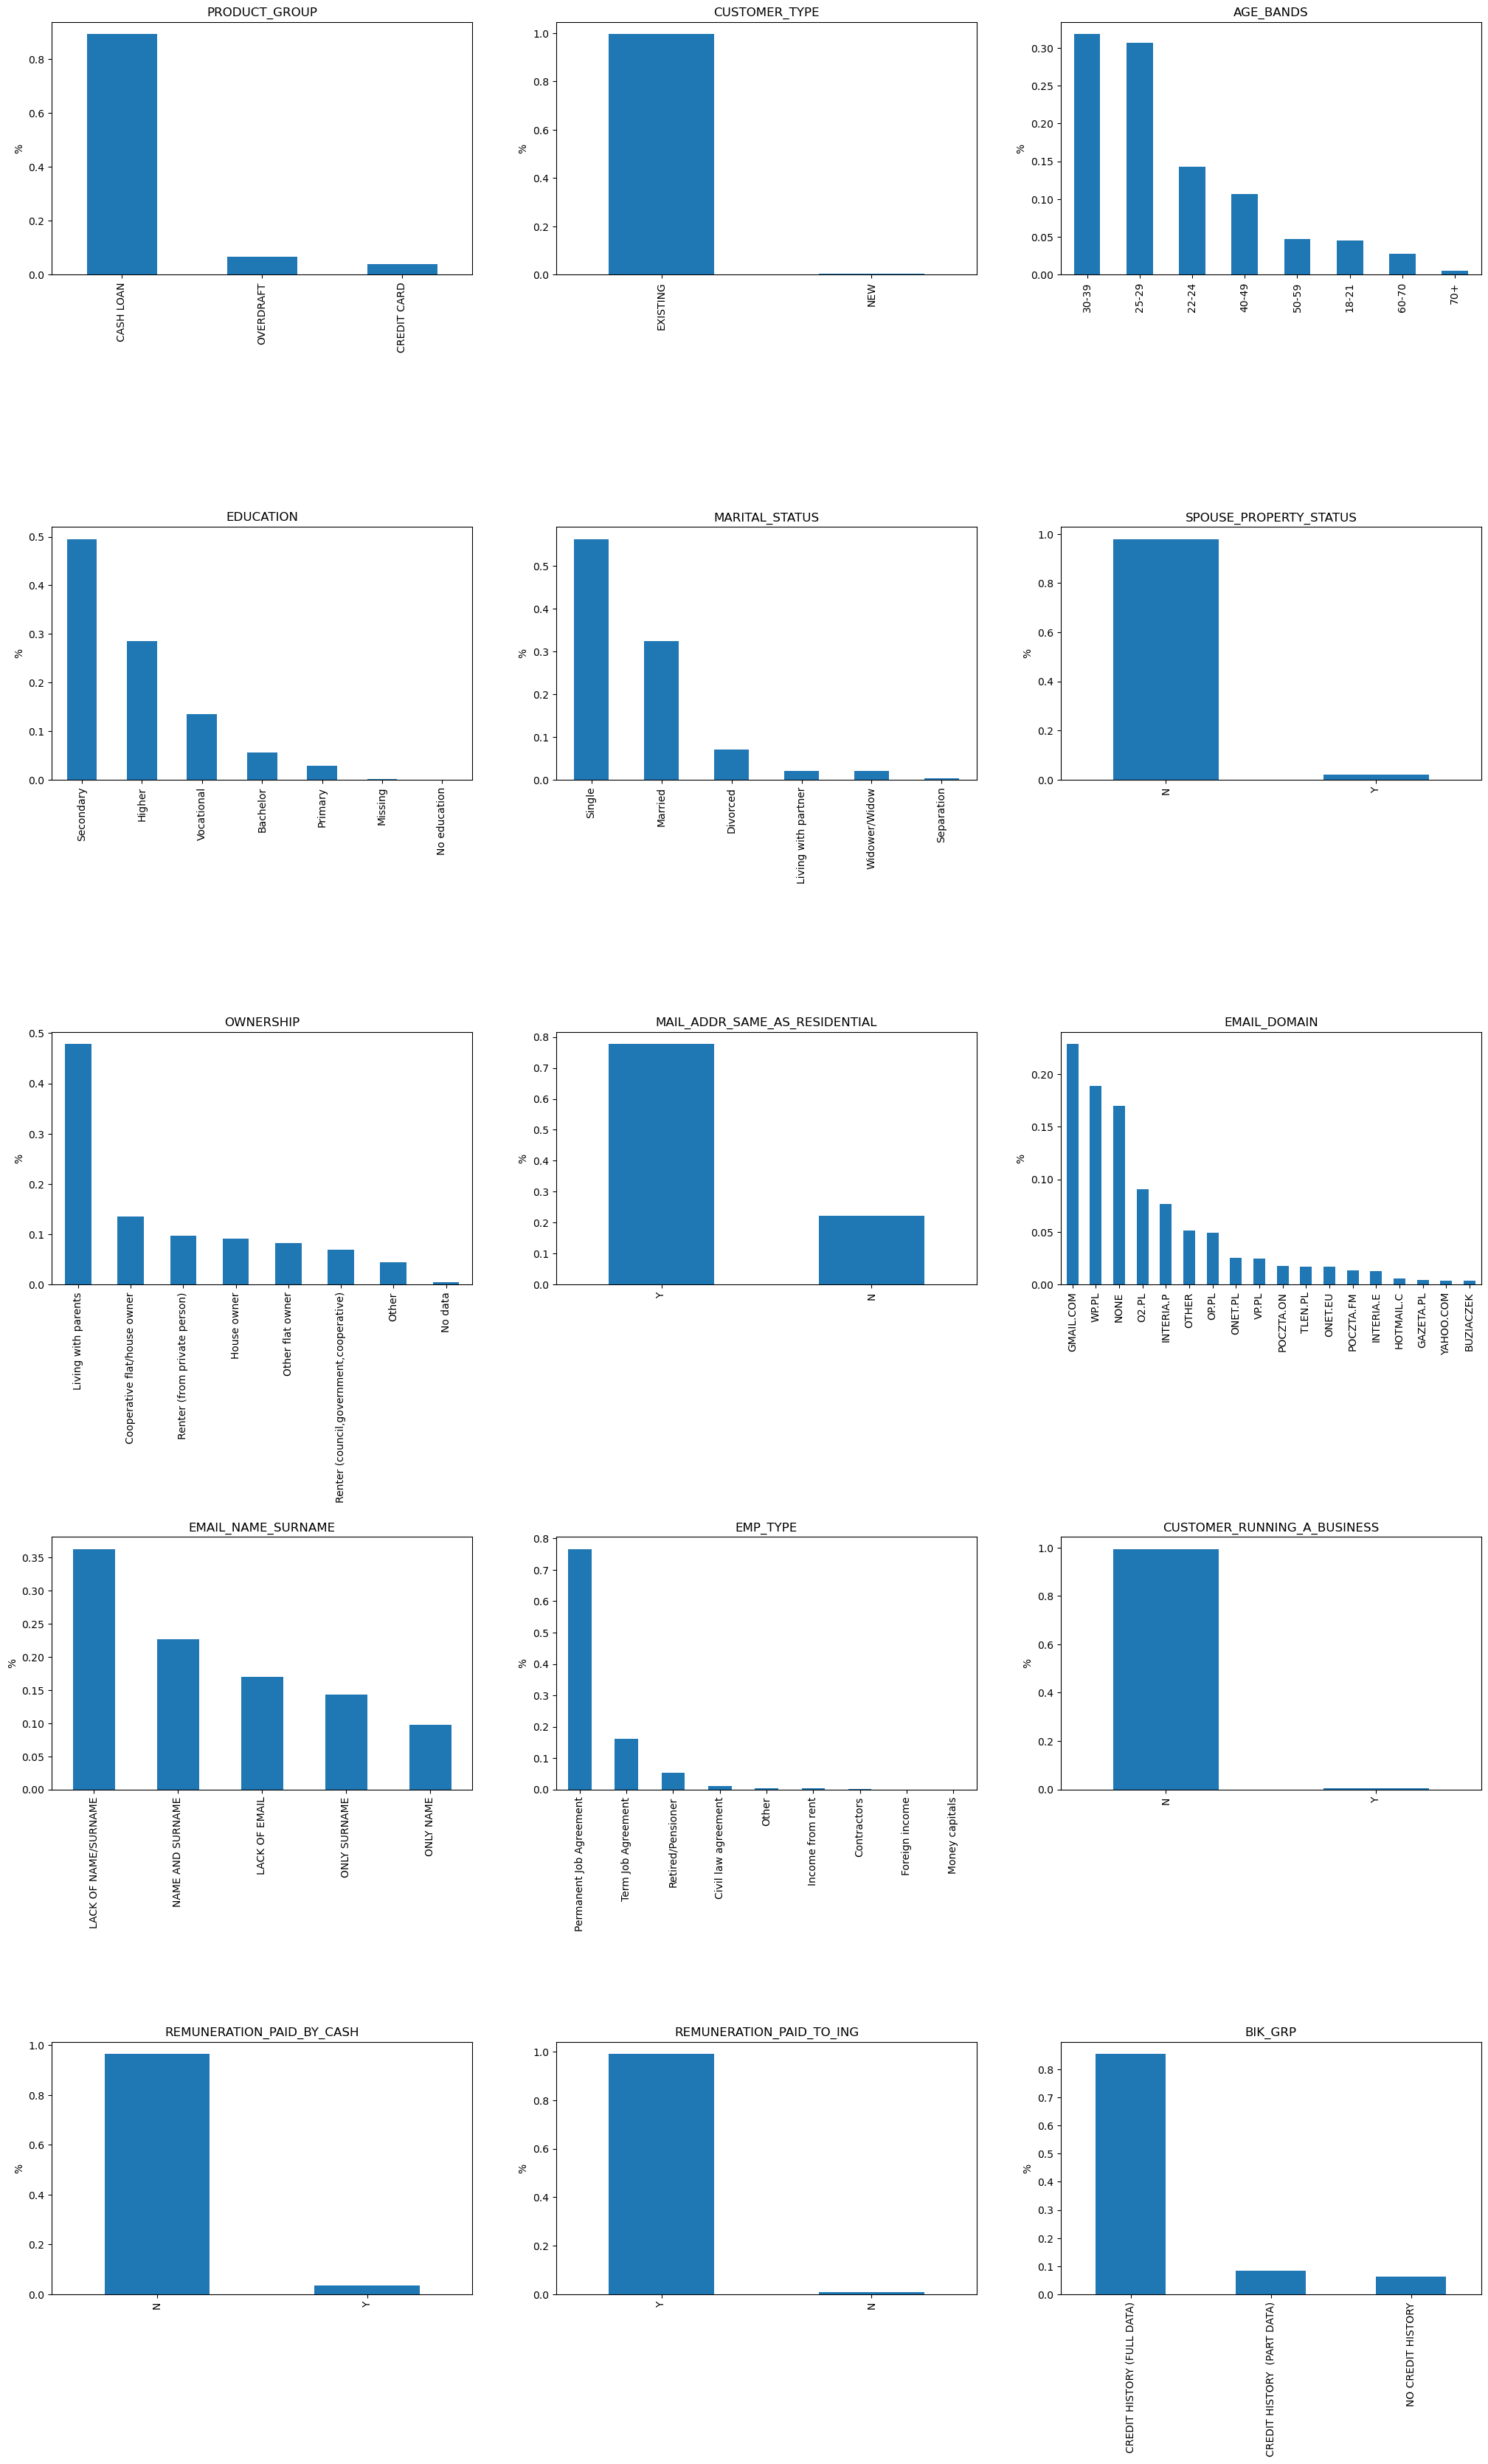

In [94]:
fig = plt.figure(figsize = (25,40))
for i, feature in enumerate(categorical_features):
    ax = fig.add_subplot(5, 3, i+1)
    ax.set_title(feature)
    (data[feature].value_counts()/len(data[feature])).plot.bar()
    #ax = sns.countplot(data=train,x=feature,hue='Loan Status')
    ax.set(ylabel = '%')
plt.subplots_adjust(hspace = 1, wspace = 0.2)
plt.show()

# Numerical variables analysis

In [95]:
numerical_features = data.select_dtypes(exclude = ['object']).columns
numerical_features

Index(['CUSTOMER_ID', 'APPLICATION_ID', 'DEFAULT_FLAG', 'APPLICATION_WEEKDAY',
       'APPLICATION_MONTH', 'APPLICATION_YEAR', 'LOAN_PERIOD', 'CREDIT_AMOUNT',
       'COOP_PERIOD', 'CREDIT_COOP_PERIOD', 'AGE', 'NUMBER_OF_FAMILY_MEMBERS',
       'SENIORITY', 'DECLARED_INCOME', 'INCOME_3M', 'DECLARED_EXPEDITURES',
       'NO_INFLOWS', 'NO_NONCASH_CHARGES', 'NO_CASH_CHARGES', 'SAVING_BALANCE',
       'CREDIT_BALANCE', 'CREDIT_BALANCE_TO_LIMIT', 'DUE_AMOUNT', 'DPD',
       'DPD_FALL_IN_12M', 'BIK_NUM_REQ_TOTAL_LZ3', 'BIK_NUM_REQ_TOTAL_LZ4_12',
       'BIK_ACC_NUM_TOTAL_CLOSE', 'BIK_ACC_NUM_TOTAL_OPEN',
       'BIK_BAL_TOTAL_OPEN', 'BIK_OVERDUE_12M_TOTAL_MAX',
       'BIK_OVERDUE_EVER_TOTAL_MAX'],
      dtype='object')

In [96]:
# droping non-important features
numerical_features = numerical_features.drop(['CUSTOMER_ID','APPLICATION_ID','DEFAULT_FLAG','APPLICATION_WEEKDAY','APPLICATION_MONTH', 'APPLICATION_YEAR'])

# Outliers detection

For outliers detection I am using box-plots. <br>
IQR = Q3 - Q1 <br>
Anything outside of this range are considered as outliers: <br>
(Q1 - IQR * 1.5; Q3 + 1.5 * IQR)

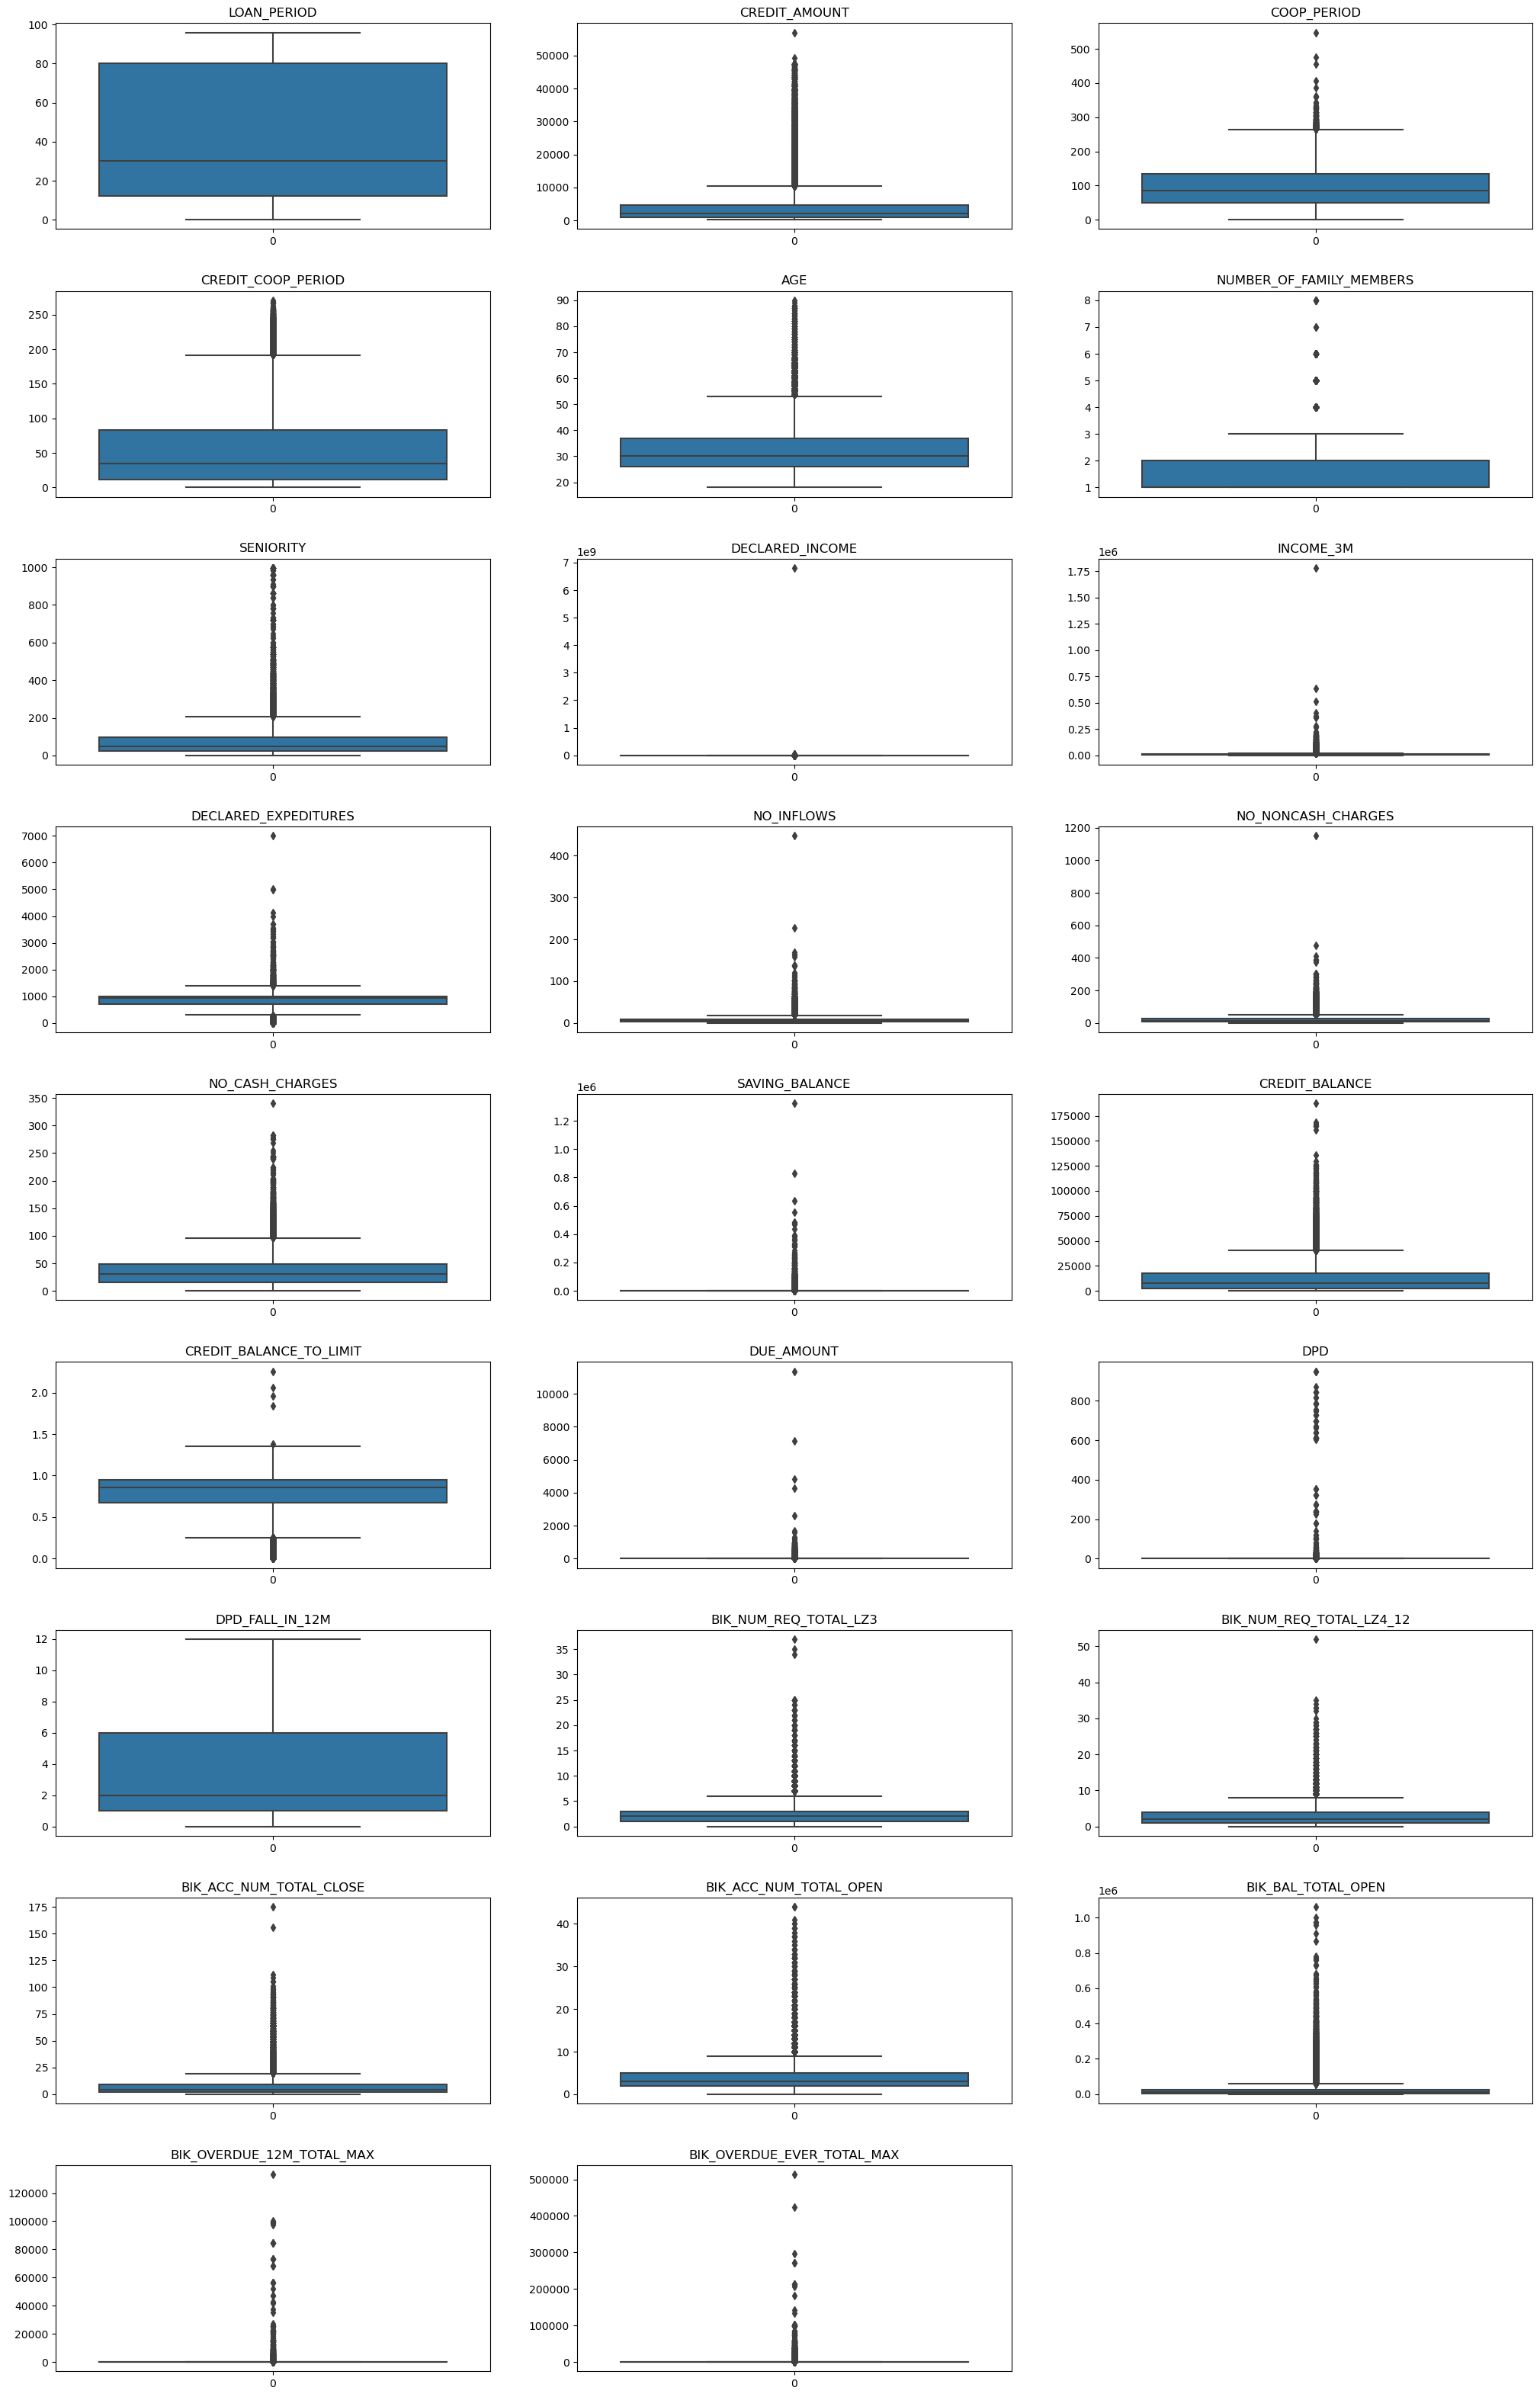

In [97]:
fig = plt.figure(figsize=(25,40))
for i , feature in enumerate(numerical_features):
    ax = fig.add_subplot(9,3,i+1)
    ax.set_title(feature)
    sns.boxplot(data=data[feature], ax=ax)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()

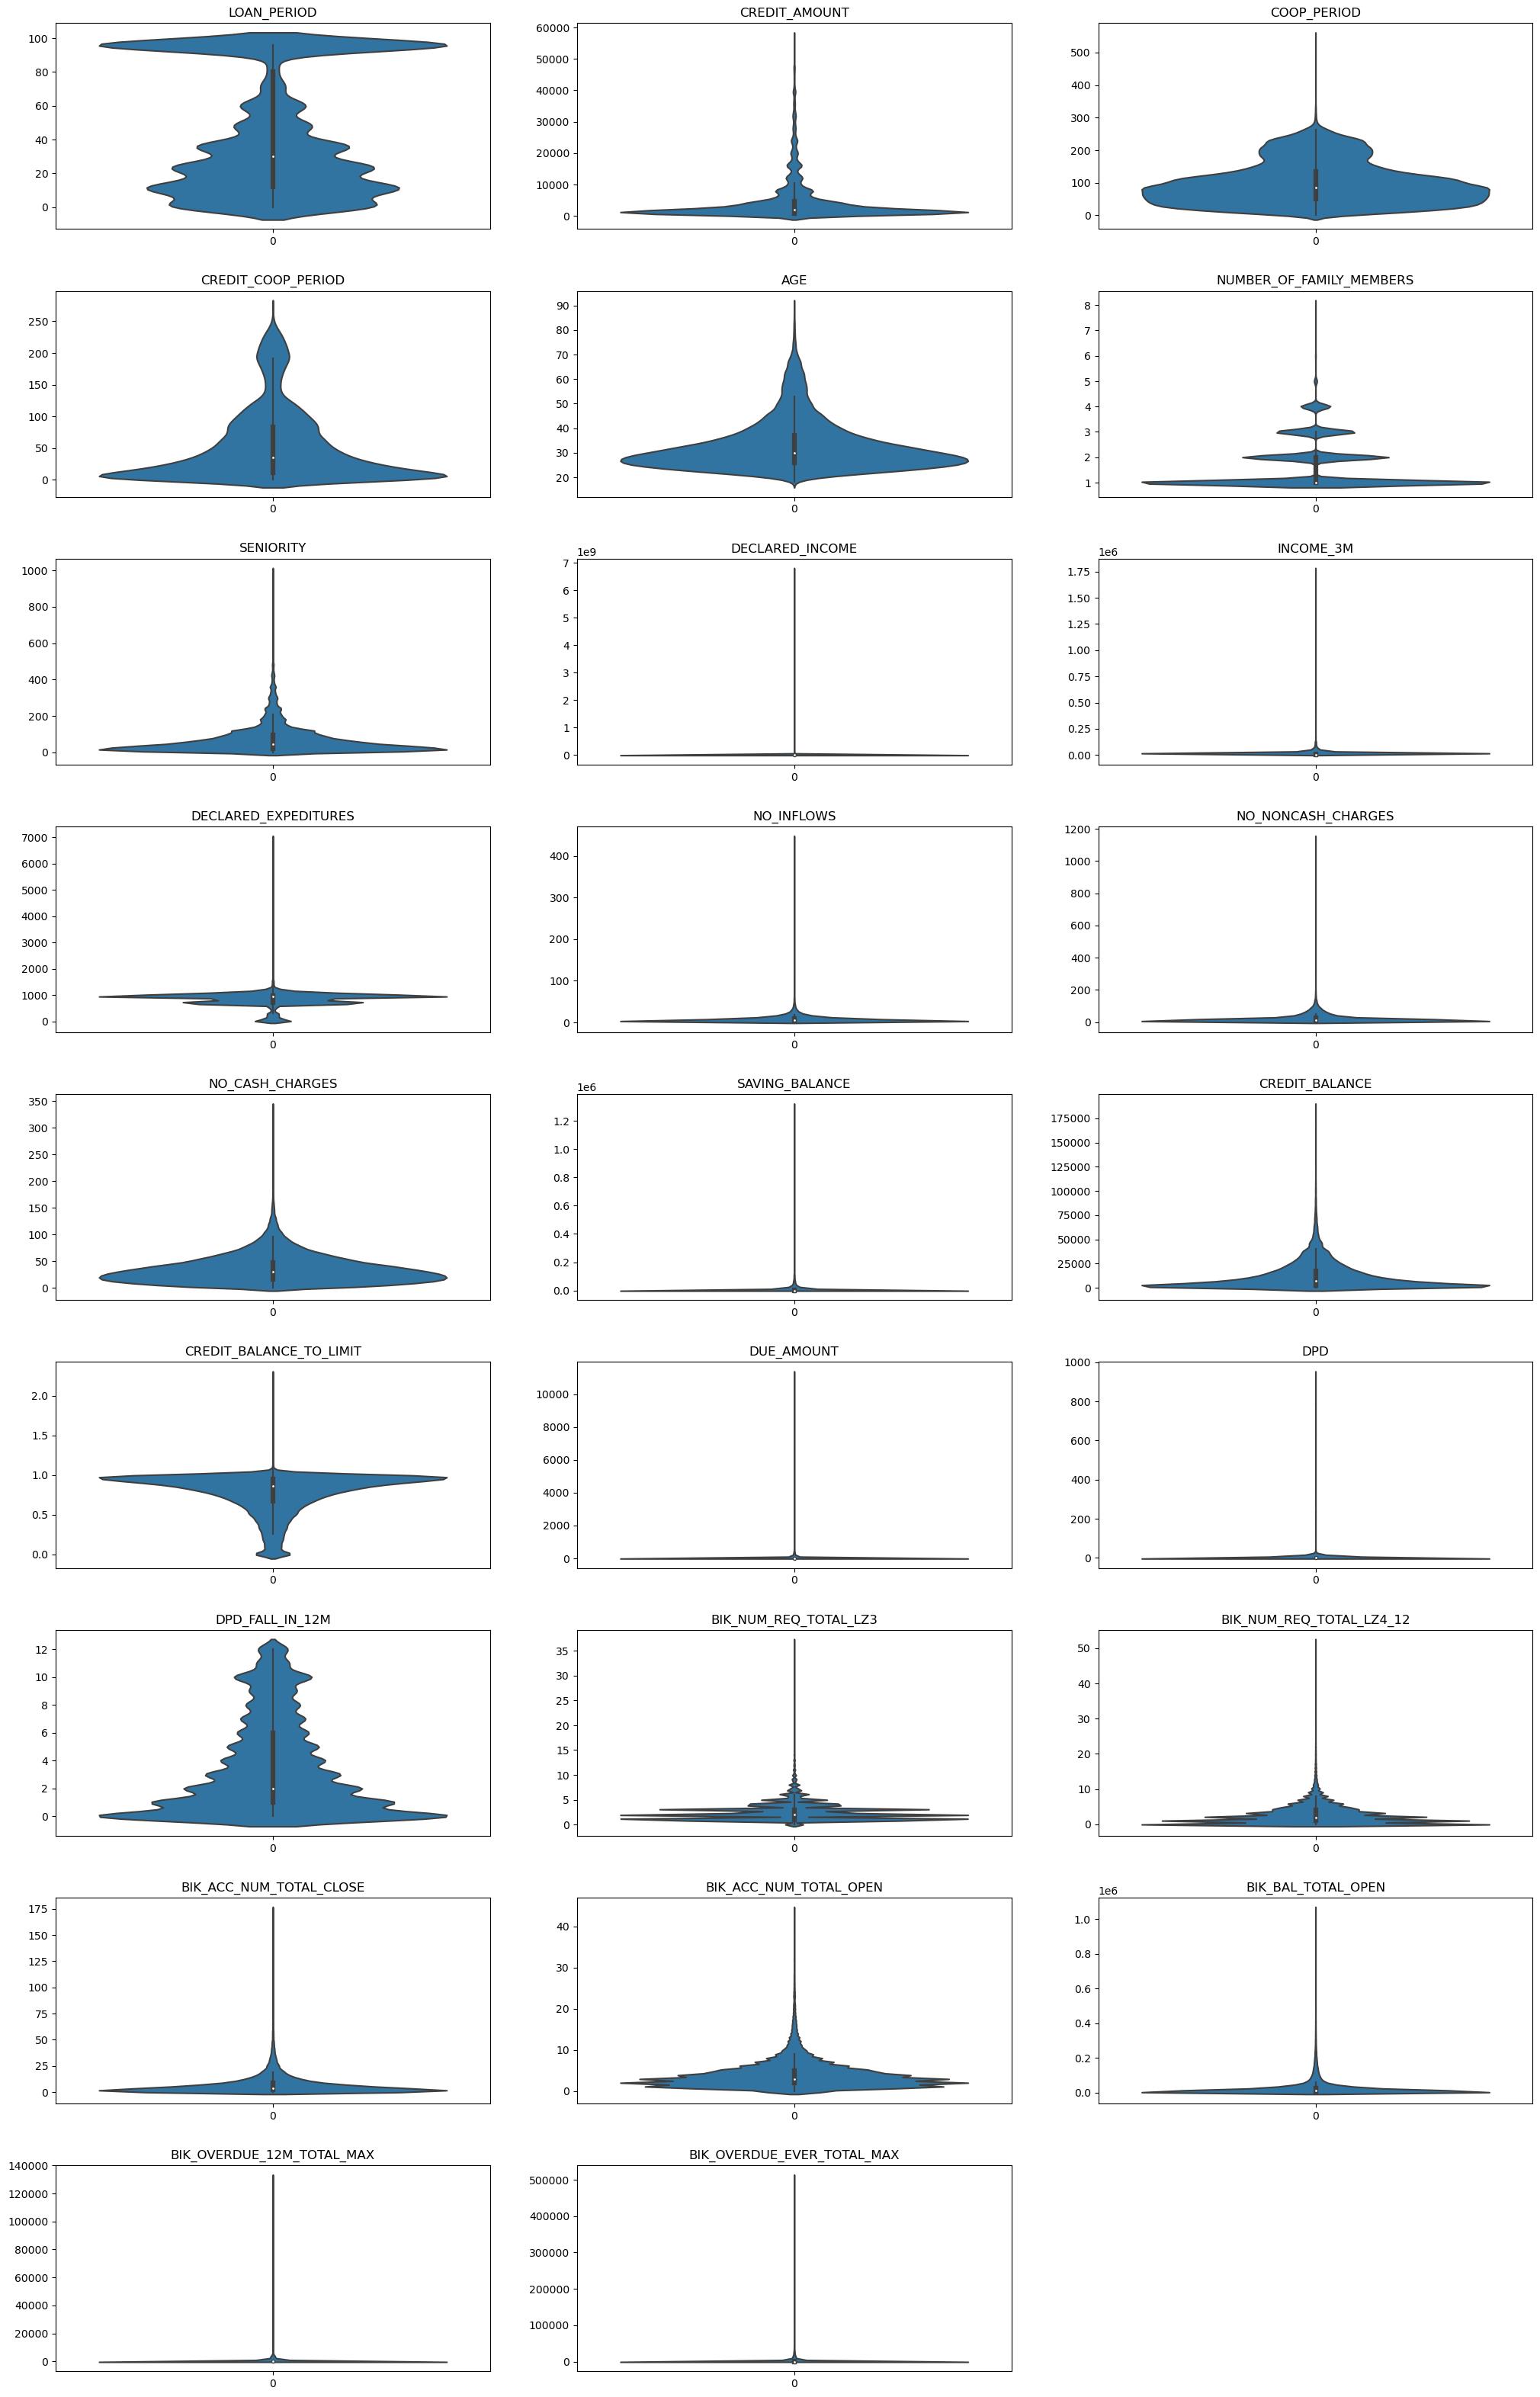

In [98]:
fig = plt.figure(figsize=(25,40))
for i , feature in enumerate(numerical_features):
    ax = fig.add_subplot(9,3,i+1)
    ax.set_title(feature)
    sns.violinplot(data=data[feature], ax=ax)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()

Z-score outliers detection: <br>
y = (x - mean) / std <br>
Range for non-outliers: (-3; 3)

In [99]:
indeks = []
count = []
avg = []
deviation = []
minimum = []
maximum = []
quant1 = []
median = []
quant3 = []
count_out_box = []
perc_out_box = []
count_out_z = []
perc_out_z = []

for feature in numerical_features:
    indeks.append(feature)
    count.append(data[feature].count())
    avg.append(data[feature].mean())
    deviation.append(data[feature].std())
    median.append(data[feature].median())
    minimum.append(data[feature].min())
    maximum.append(data[feature].max())
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    quant1.append(q1)
    quant3.append(q3)
    count_out_box.append(sum(data[feature] > q3 + 1.5*iqr) + sum(data[feature] < q3 - 1.5*iqr))
    perc_out_box.append((sum(data[feature] > q3 + 1.5*iqr) + sum(data[feature] < q3 - 1.5*iqr)) / data[feature].count())
    count_out_z.append(sum(abs((data[feature] - data[feature].mean()) / data[feature].std())> 3))
    perc_out_z.append((sum(abs((data[feature] - data[feature].mean()) / data[feature].std())> 3)) / data[feature].count())

outliers_table=pd.DataFrame({'Count':count, "Mean":avg, "Std":deviation, "Minimum":minimum, "Maximum":maximum,
                    "I Quartile":quant1, "Median":median,"III Quarile":quant3, "Outliers count box":count_out_box, 
                     "Outliers Percent(box)":perc_out_box, "Outliers count Z":count_out_z, "Outliers Percent(Z)":perc_out_z}, index=indeks)

outliers_table

Count          Mean           Std  Minimum  \
LOAN_PERIOD                 79155     41.482774  3.539007e+01      0.0   
CREDIT_AMOUNT               79155   4667.297075  6.685304e+03    200.0   
COOP_PERIOD                 79155     98.584979  6.406675e+01      0.0   
CREDIT_COOP_PERIOD          79155     55.941305  5.883804e+01      0.0   
AGE                         79155     33.011800  1.026030e+01     18.0   
NUMBER_OF_FAMILY_MEMBERS    79155      1.656257  9.160927e-01      1.0   
SENIORITY                   79155     69.889900  8.029742e+01      1.0   
DECLARED_INCOME             79155  91034.325437  2.418131e+07    860.0   
INCOME_3M                   78384   8288.956930  1.235102e+04    100.0   
DECLARED_EXPEDITURES        54563    851.899682  2.651746e+02      0.0   
NO_INFLOWS                  78384      7.414498  7.770220e+00      0.0   
NO_NONCASH_CHARGES          78384     22.779407  2.487681e+01      0.0   
NO_CASH_CHARGES             78384     35.131889  2.611739e+01      0.0   
SAVING_BALANCE              64496   2133.989705  1.376783e+04      0.0   
CREDIT_BALANCE              65876  12404.066883  1.405293e+04      0.0   
CREDIT_BALANCE_TO_LIMIT     65876      0.766987  2.505089e-01      0.0   
DUE_AMOUNT                  65876      7.041563  7.258189e+01      0.0   
DPD                         65876      1.007833  1.819306e+01      0.0   
DPD_FALL_IN_12M             71972      3.437851  3.445301e+00      0.0   
BIK_NUM_REQ_TOTAL_LZ3       79155      2.511515  1.821091e+00      0.0   
BIK_NUM_REQ_TOTAL_LZ4_12    79155      2.491542  2.715710e+00      0.0   
BIK_ACC_NUM_TOTAL_CLOSE     74222      6.885977  8.925993e+00      0.0   
BIK_ACC_NUM_TOTAL_OPEN      74222      3.934777  3.395230e+00      0.0   
BIK_BAL_TOTAL_OPEN          74222  25089.024144  4.701492e+04      0.0   
BIK_OVERDUE_12M_TOTAL_MAX   74222    138.406807  1.492919e+03      0.0   
BIK_OVERDUE_EVER_TOTAL_MAX  74222    572.854356  4.628737e+03      0.0   

                                 Maximum  I Quartile        Median  \
LOAN_PERIOD                 9.600000e+01    12.00000     30.000000   
CREDIT_AMOUNT               5.700000e+04   900.00000   2100.000000   
COOP_PERIOD                 5.480000e+02    49.00000     86.000000   
CREDIT_COOP_PERIOD          2.710000e+02    11.00000     35.000000   
AGE                         9.000000e+01    26.00000     30.000000   
NUMBER_OF_FAMILY_MEMBERS    8.000000e+00     1.00000      1.000000   
SENIORITY                   9.960000e+02    22.00000     47.000000   
DECLARED_INCOME             6.802954e+09  2150.00000   2680.000000   
INCOME_3M                   1.781100e+06  3600.00000   5600.000000   
DECLARED_EXPEDITURES        7.000000e+03   705.91000    940.000000   
NO_INFLOWS                  4.470000e+02     3.00000      5.000000   
NO_NONCASH_CHARGES          1.151000e+03     9.00000     14.000000   
NO_CASH_CHARGES             3.400000e+02    16.00000     30.000000   
SAVING_BALANCE              1.320900e+06     0.00000      0.000000   
CREDIT_BALANCE              1.872600e+05  2470.00000   7400.000000   
CREDIT_BALANCE_TO_LIMIT     2.255768e+00     0.67051      0.858491   
DUE_AMOUNT                  1.137000e+04     0.00000      0.000000   
DPD                         9.490000e+02     0.00000      0.000000   
DPD_FALL_IN_12M             1.200000e+01     1.00000      2.000000   
BIK_NUM_REQ_TOTAL_LZ3       3.700000e+01     1.00000      2.000000   
BIK_NUM_REQ_TOTAL_LZ4_12    5.200000e+01     1.00000      2.000000   
BIK_ACC_NUM_TOTAL_CLOSE     1.750000e+02     2.00000      4.000000   
BIK_ACC_NUM_TOTAL_OPEN      4.400000e+01     2.00000      3.000000   
BIK_BAL_TOTAL_OPEN          1.061300e+06  3050.00000  10250.000000   
BIK_OVERDUE_12M_TOTAL_MAX   1.330670e+05     0.00000      0.000000   
BIK_OVERDUE_EVER_TOTAL_MAX  5.127830e+05     0.00000     13.000000   

                             III Quarile  Outliers count box  \
LOAN_PERIOD                    80.000000                   0   
CREDIT_AMO

# Missing values
Checking what is the reason of missing data and if that missing has some information

In [100]:
missings = pd.DataFrame({'Missing values': data.isnull().sum()[data.isnull().sum()>0],
                         'Perc Missing': data.isnull().sum()[data.isnull().sum()>0] / len(data)})
missings

Missing values  Perc Missing
INCOME_3M                              771      0.009740
DECLARED_EXPEDITURES                 24592      0.310682
NO_INFLOWS                             771      0.009740
NO_NONCASH_CHARGES                     771      0.009740
NO_CASH_CHARGES                        771      0.009740
SAVING_BALANCE                       14659      0.185194
CREDIT_BALANCE                       13279      0.167759
CREDIT_BALANCE_TO_LIMIT              13279      0.167759
DUE_AMOUNT                           13279      0.167759
DPD                                  13279      0.167759
DPD_FALL_IN_12M                       7183      0.090746
BIK_ACC_NUM_TOTAL_CLOSE               4933      0.062321
BIK_ACC_NUM_TOTAL_OPEN                4933      0.062321
BIK_BAL_TOTAL_OPEN                    4933      0.062321
BIK_OVERDUE_12M_TOTAL_MAX             4933      0.062321
BIK_OVERDUE_EVER_TOTAL_MAX            4933      0.062321

INCOME_3M, NO_INFLOWS, NO_NONCASH_CHARGES, NO_CASH_CHARGES - no bank account <br>
DECLARED_EXPEDITURES - a lot of missing, can bring some information about aplicants <br>
SAVING_BALANCE - a lof of missing, we can not be sure if that means that this client has non savings, can bring information<br>
CREDIT_BALANCE, CREDIT_BALANCE_TO_LIMIT, DUE_AMOUNT, DPD - Missing means that client didn't had any credit products in this bank<br>
DPD_FALL_IN_12M - none credit products in last 12 months<br>
BIK_ACC_NUM_TOTAL_CLOSE, BIK_ACC_NUM_TOTAL_OPEN, BIK_BAL_TOTAL_OPEN, BIK_OVERDUE_12M_TOTAL_MAX, BIK_OVERDUE_EVER_TOTAL_MAX - missing means none credit products in any bank, can bring some information<br>

Some values will be imputed with median, but for some there will be created separate column with 0-1 values, in which case missing will be marked as 1 to not delete meaningful information

In [101]:
noninportant_features = ['CUSTOMER_ID','APPLICATION_ID', 'APPLICATION_DATE','APPLICATION_HOUR', 'APPLICATION_WEEKDAY',
                    'APPLICATION_MONTH', 'APPLICATION_YEAR', 'MARKETING_CONSENT']

data_final = data.drop(noninportant_features, axis = 1)

X, y = data_final.drop(['DEFAULT_FLAG'],axis=1), data_final['DEFAULT_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2423)

In [102]:
print(f"Train set default rate: {round(y_train.mean() * 100, 4)}")
print(f"Test set default rate: {round(y_test.mean() * 100,4)}")

Train set default rate: 4.2401
Test set default rate: 4.2448


# Feature selection

Default rate for categorical variables

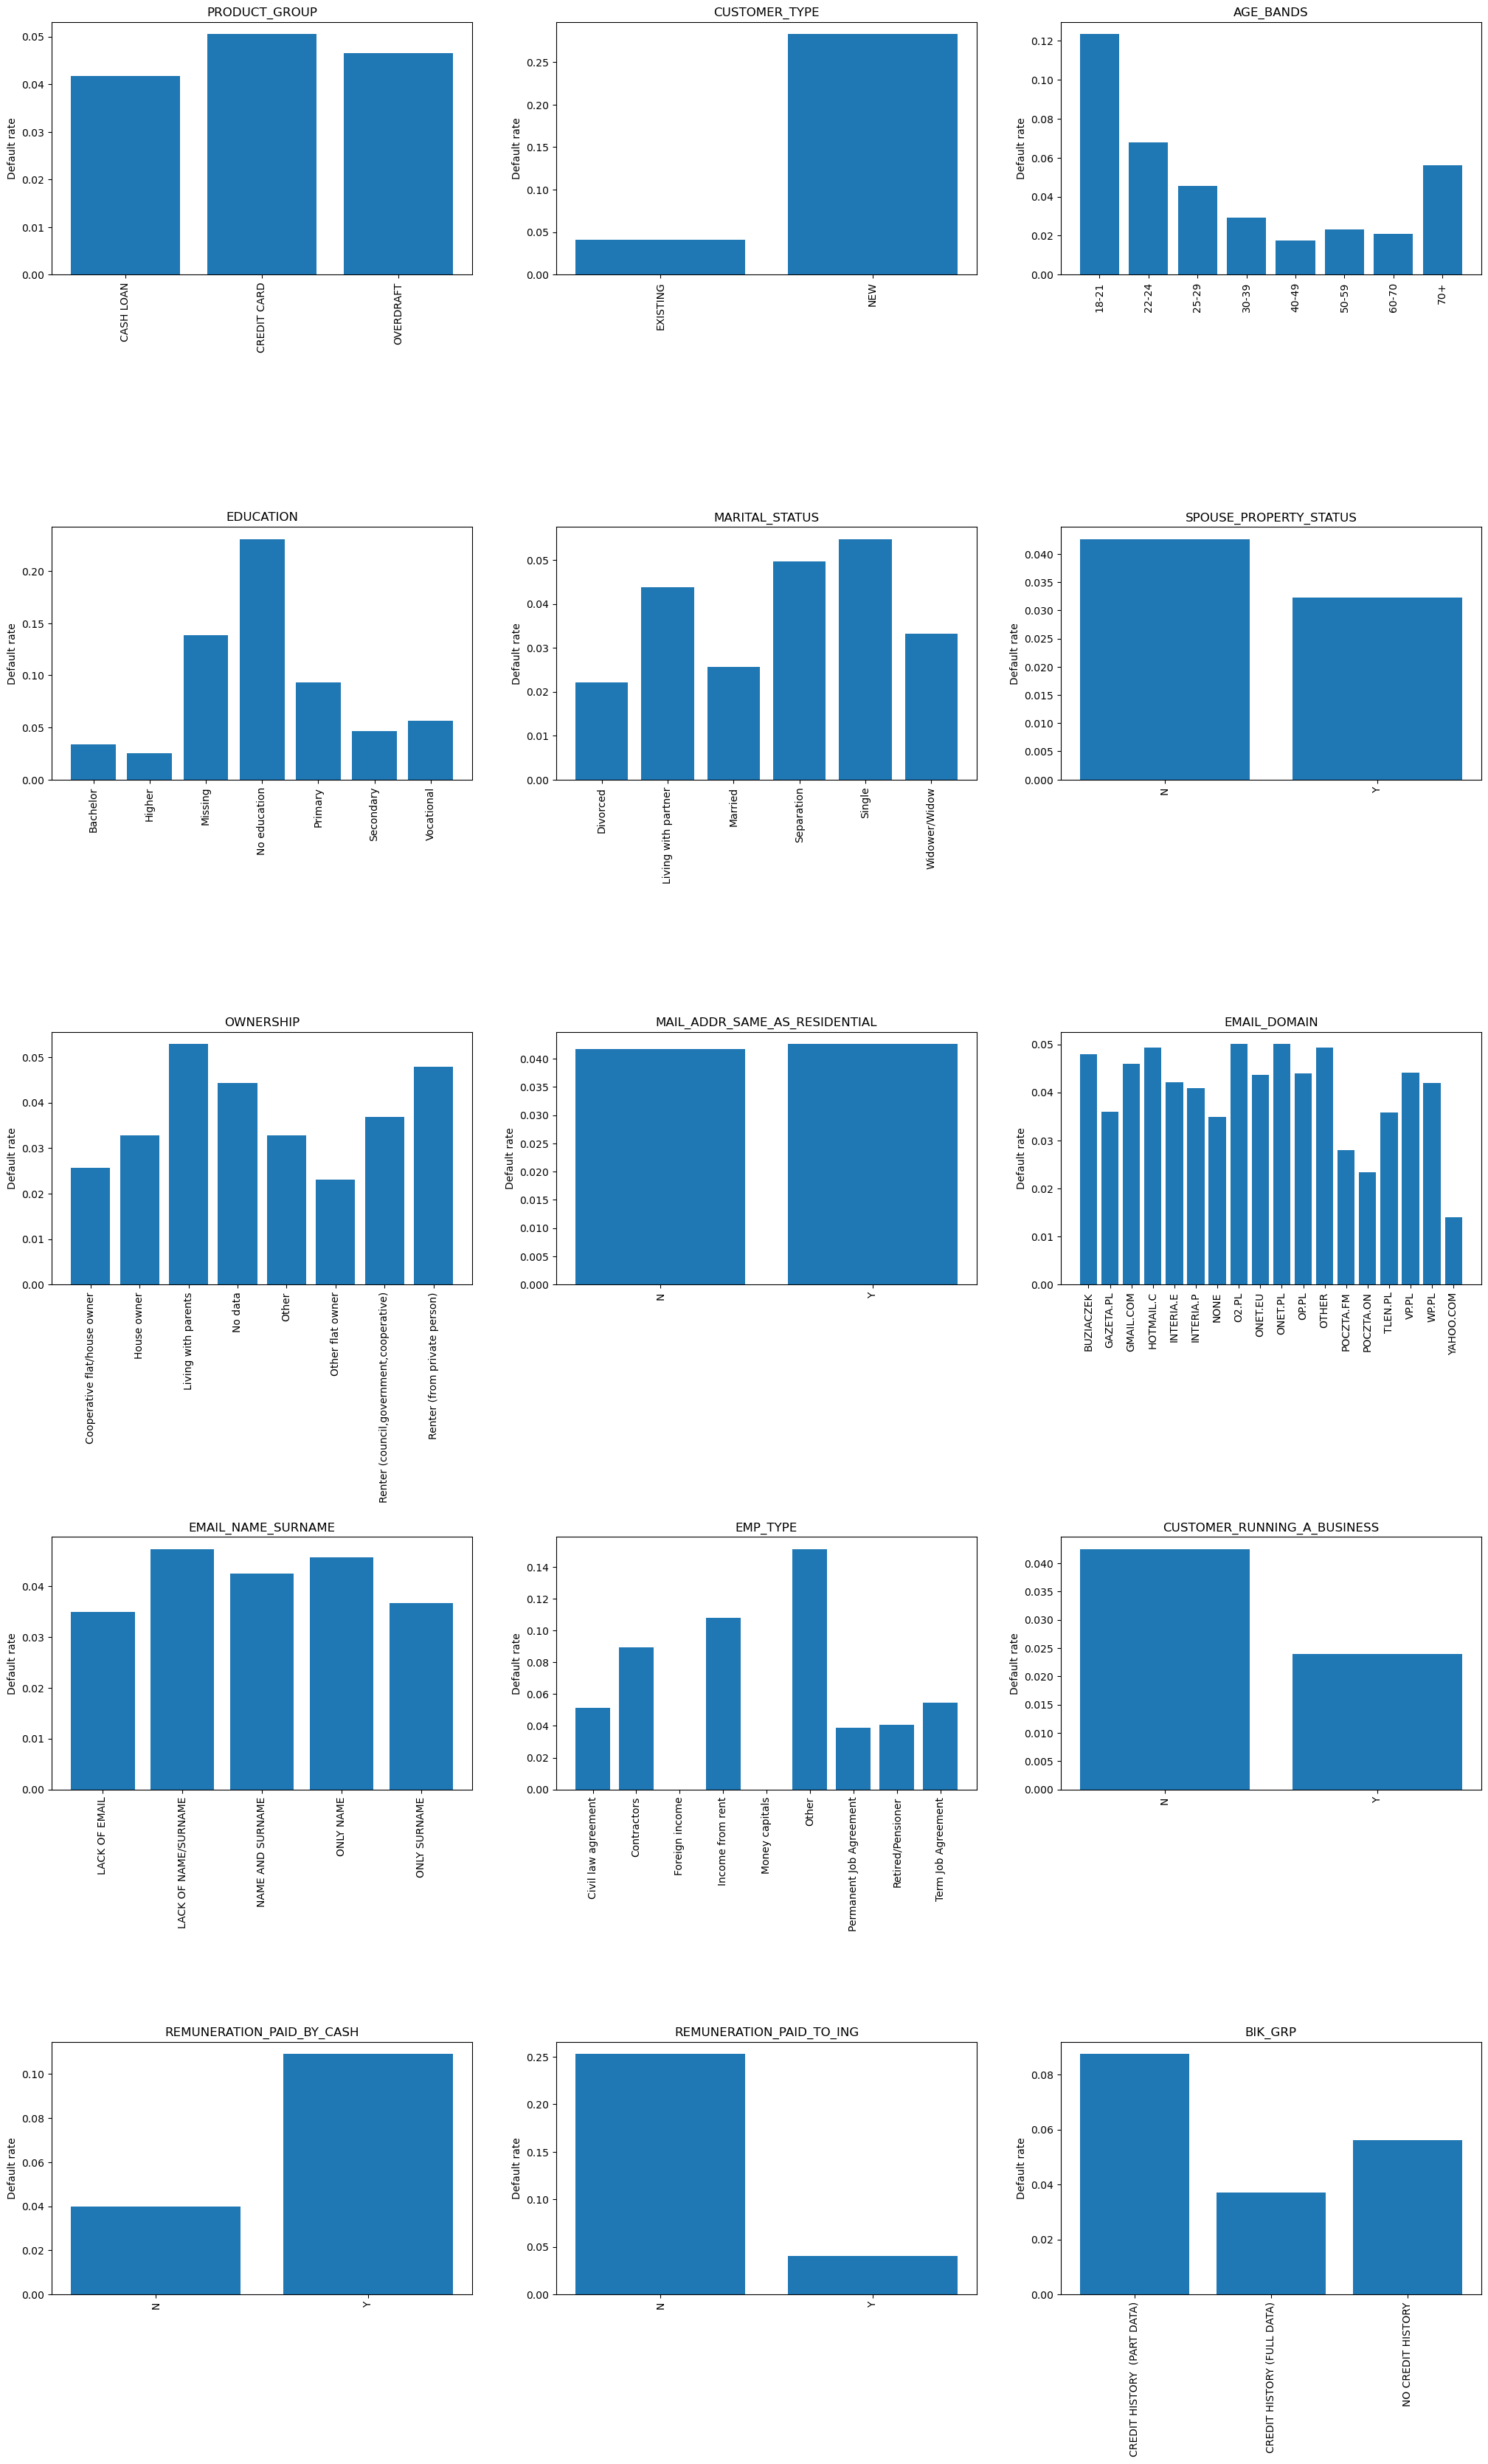

In [103]:
fig = plt.figure(figsize=(25,40))
for i , feature in enumerate(categorical_features):
    ax = fig.add_subplot(5,3,i+1)
    ax.set_title(feature)
    ax.set(ylabel="Default rate")  
    a=data[['DEFAULT_FLAG', feature]].groupby([feature]).mean()
    ax.bar(a.index,a.iloc[:,0])
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90)
plt.subplots_adjust(hspace = 1, wspace = 0.2)
plt.show()

We can see that for some features there are classes that are poorly represtented, there is an option to map them with other classes in that features, but we need to be sure this will not make us lose information. To check if there is a diffrence between classes that we want to map we can use chi-square contigency test.

# Numerical features analysis

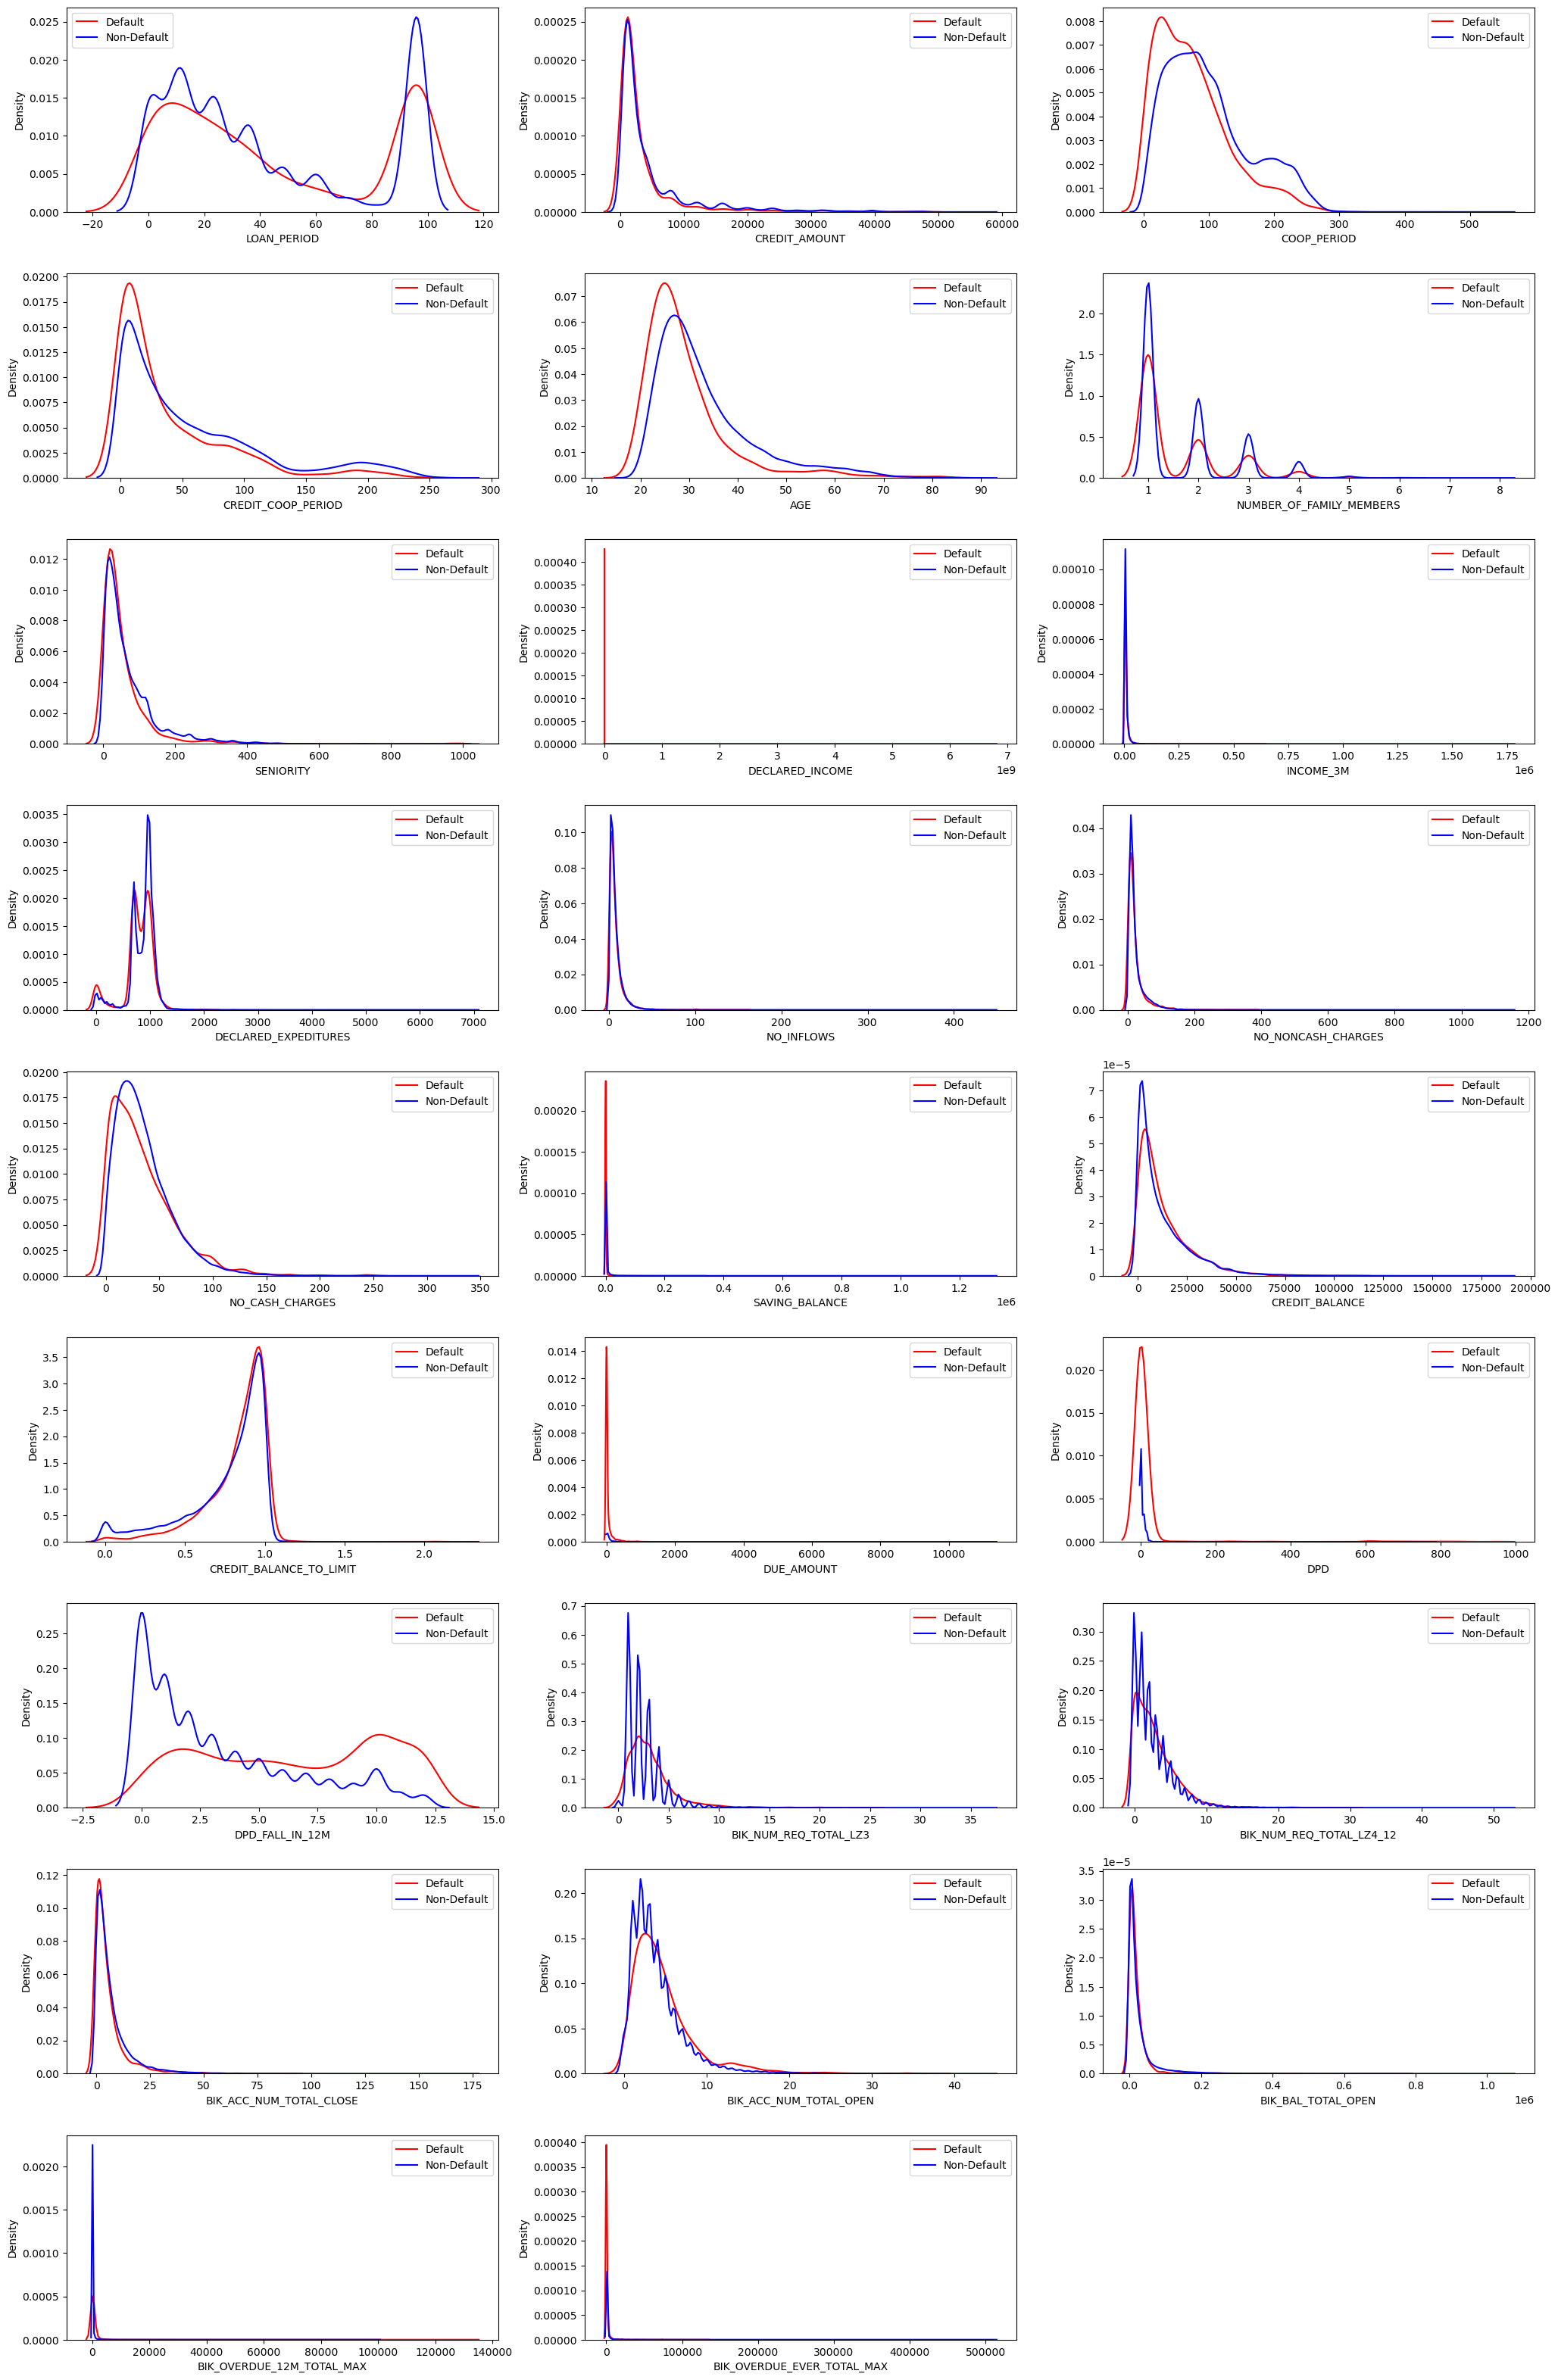

In [104]:
fig = plt.figure(figsize = (25, 40))
for i, feature in enumerate(numerical_features):
    ax = fig.add_subplot(9, 3, i+1)
    sns.distplot(data.loc[data["DEFAULT_FLAG"] == 1, feature], hist = False, ax = ax, color = "red", label = "Default")
    sns.distplot(data.loc[data["DEFAULT_FLAG"] == 0, feature], hist = False, ax = ax, color = "blue", label = "Non-Default")
    plt.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()

Only DPD_FALL_IN_12M feature stands out from this plot as feature to consider for the model

In [105]:
missings.index

Index(['INCOME_3M', 'DECLARED_EXPEDITURES', 'NO_INFLOWS', 'NO_NONCASH_CHARGES',
       'NO_CASH_CHARGES', 'SAVING_BALANCE', 'CREDIT_BALANCE',
       'CREDIT_BALANCE_TO_LIMIT', 'DUE_AMOUNT', 'DPD', 'DPD_FALL_IN_12M',
       'BIK_ACC_NUM_TOTAL_CLOSE', 'BIK_ACC_NUM_TOTAL_OPEN',
       'BIK_BAL_TOTAL_OPEN', 'BIK_OVERDUE_12M_TOTAL_MAX',
       'BIK_OVERDUE_EVER_TOTAL_MAX'],
      dtype='object')

In [106]:
# Default rate in missings
for feature in missings.index:
    dr0 = data[data[feature] == 0]['DEFAULT_FLAG'].sum() / data[data[feature] == 0]['DEFAULT_FLAG'].count()
    dr_miss = data[data[feature].isnull()]['DEFAULT_FLAG'].sum() / data[data[feature].isnull()]['DEFAULT_FLAG'].count()
    print(f'For feature: {feature}')
    print(f"Default rate for 0 values: {round(dr0 * 100, 4)}%")
    print(f"Default rate for missing values: {round(dr_miss * 100, 4)}%")
    print('')

For feature: INCOME_3M
Default rate for 0 values: nan%
Default rate for missing values: 25.2918%

For feature: DECLARED_EXPEDITURES
Default rate for 0 values: 10.8275%
Default rate for missing values: 4.0216%

For feature: NO_INFLOWS
Default rate for 0 values: 18.0952%
Default rate for missing values: 25.2918%

For feature: NO_NONCASH_CHARGES
Default rate for 0 values: 10.3175%
Default rate for missing values: 25.2918%

For feature: NO_CASH_CHARGES
Default rate for 0 values: 8.6281%
Default rate for missing values: 25.2918%

For feature: SAVING_BALANCE
Default rate for 0 values: 5.175%
Default rate for missing values: 5.1641%

For feature: CREDIT_BALANCE
Default rate for 0 values: 1.142%
Default rate for missing values: 2.6207%

For feature: CREDIT_BALANCE_TO_LIMIT
Default rate for 0 values: 1.142%
Default rate for missing values: 2.6207%

For feature: DUE_AMOUNT
Default rate for 0 values: 3.6438%
Default rate for missing values: 2.6207%

For feature: DPD
Default rate for 0 values: 3.6

For some cases using median for imputing missing values can affect in losing information (INCOME_3M, NO_INFLOWS, NO_NONCASH_CHARGES, NO_CASH_CHARGES)

In [107]:
# Creates new 0-1 variable based on missings of another, 0 - no missing, 1 - missing
class TransformerNewFeatNonNuLL(TransformerMixin,BaseEstimator):
    def __init__(self, feature):
        self.feature=feature

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        for feature in self.feature:
            X[feature]=np.where(X[feature].isnull(),1,0)
        return X

In [119]:
# Creates new variable based on values, 0 - observetion = 0, 1 - observation > 0
class TransformerNew(TransformerMixin,BaseEstimator):
    def __init__(self, feature):
        self.feature=feature

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        for feature in self.feature:
            X[feature]=np.where(X[feature]>0,1,0)
        return X

# Multivariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

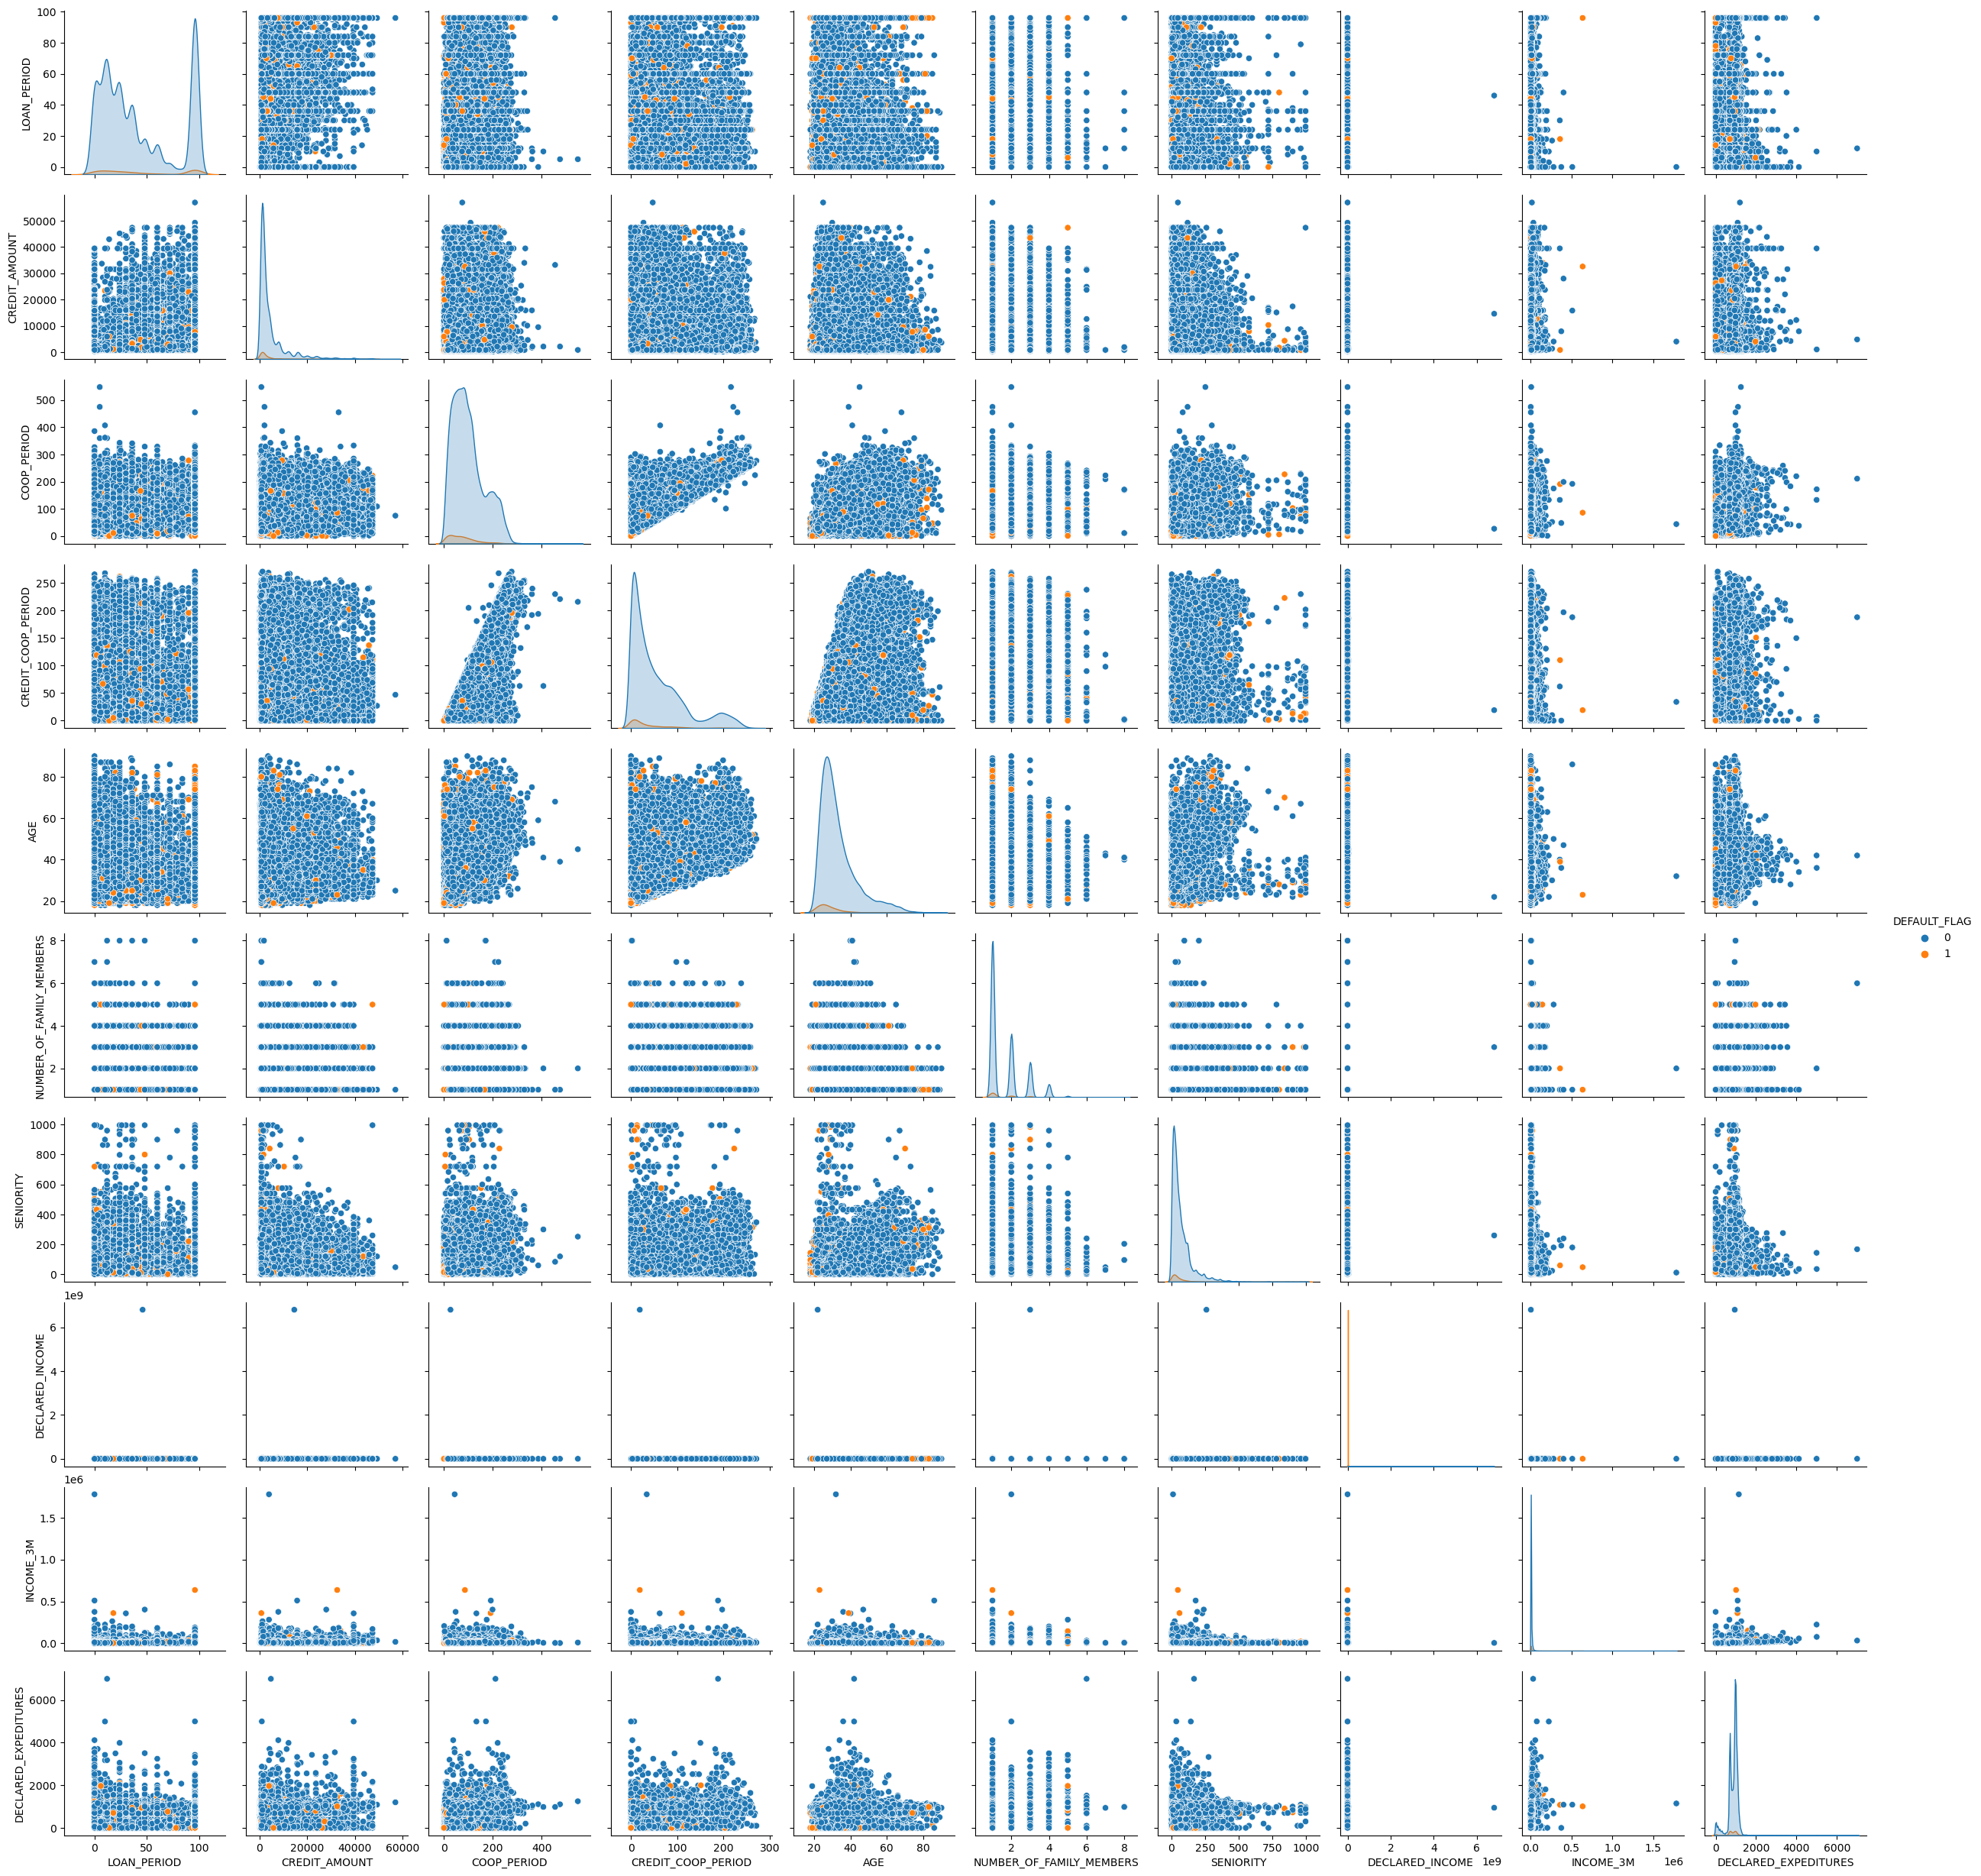

In [109]:
# numfea = ['LOAN_PERIOD', 'CREDIT_AMOUNT', 'COOP_PERIOD', 'CREDIT_COOP_PERIOD',
#        'AGE', 'NUMBER_OF_FAMILY_MEMBERS', 'SENIORITY', 'DECLARED_INCOME',
#        'INCOME_3M', 'DECLARED_EXPEDITURES','DEFAULT_FLAG']
# sns.pairplot(data[numfea], hue = 'DEFAULT_FLAG')
# plt.show

In [112]:
# Transformer to select only features that we want to consider
class TransformerFeature(TransformerMixin,BaseEstimator):
    
    def __init__(self, feature):
        self.feature=feature

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        return X[self.feature]

In [117]:
# Transformer to map class in feature that are low represented
class TransformerLowCat(TransformerMixin,BaseEstimator):
    
    def __init__(self,feature):
        self.feature=feature

            
    def fit(self, X, y=None):
        self.lista_kateg=[]
        for feature in self.feature:
            self.lista_kateg.append([kat for kat in X[feature].unique() if len(X[X[feature]==kat])/len(X)>=0.05])
        return self
            
    
    def transform(self,X):
        i=0
        for feature in self.feature:
            X.loc[~X[feature].isin(self.lista_kateg[i]),feature]='Inne'
            i=1+i
        return X

In [113]:
# Outliers removing
class TransformerOutliers(TransformerMixin,BaseEstimator):
    def __init__(self, features):
        self.features=features

    def fit(self, X, y=None):
        self.Q1=X[self.features].quantile(0.25)
        self.Q3=X[self.features].quantile(0.75)
        self.IQR=self.Q3-self.Q1
        self.down=(self.Q1-1.5*self.IQR)
        self.up=(self.Q3+1.5*self.IQR)
        return self
    
    def transform(self,X):
        for f in self.features:
            X.loc[X[f]<self.down[f],f]=self.down[f]
            X.loc[X[f]>self.up[f],f]=self.up[f]
        return X

# Creating pipelines

In [110]:
txt_list=data_final.select_dtypes(include=['object']).columns
numeric_list=data_final.select_dtypes(exclude=['object']).columns
numeric_list=numeric_list.drop("DEFAULT_FLAG")

# For variables in which classes are poorly represtented I will be map this classes with others.
# I can't do that for every categorical variable, because there can be only 2 classes.
merge_cat_list=['AGE_BANDS', 'EDUCATION','MARITAL_STATUS', 'OWNERSHIP', 'EMAIL_DOMAIN', 'EMAIL_NAME_SURNAME', 'EMP_TYPE']

ohe_all_list=txt_list
ohe_stand_list=['PRODUCT_GROUP', 'CUSTOMER_TYPE', 'SPOUSE_PROPERTY_STATUS', 'CUSTOMER_RUNNING_A_BUSINESS', 'REMUNERATION_PAID_BY_CASH','REMUNERATION_PAID_TO_ING']

woe_list_list=['AGE_BANDS', 'EDUCATION','MARITAL_STATUS', 'OWNERSHIP', 'MAIL_ADDR_SAME_AS_RESIDENTIAL', 'EMAIL_DOMAIN',
               'EMAIL_NAME_SURNAME','EMP_TYPE', 'BIK_GRP']

In [114]:
pipe_0_list=FeatureUnion([
    ("txt", make_pipeline(TransformerFeature(txt_list),
                          OneHotEncoder(sparse = False, handle_unknown='ignore'))),
    ("num", make_pipeline(TransformerFeature(numeric_list),
                          SimpleImputer(strategy = "median")))
])

X_train_pure=X_train.copy()
X_train_pure=pd.DataFrame(pipe_0_list.fit_transform(X_train_pure,y_train))
X_test_pure=X_test.copy()
X_test_pure=pd.DataFrame(pipe_0_list.transform(X_test_pure))

In [144]:
pipe_1_list=FeatureUnion([
    ("txt", make_pipeline(TransformerFeature(txt_list),
                              TransformerLowCat(merge_cat_list),
                              OneHotEncoder(sparse=False,handle_unknown='ignore'))),
    ("num", make_pipeline(TransformerFeature(numeric_list),
                                SimpleImputer(strategy="median"),
                                RobustScaler())),
    ("num_new", make_pipeline(TransformerFeature(['DUE_AMOUNT','DPD','DPD_FALL_IN_12M','NO_INFLOWS','INCOME_3M',
                                                          'SAVING_BALANCE']),
                                      TransformerNew(['DUE_AMOUNT','SAVING_BALANCE','NO_INFLOWS', 'DPD_FALL_IN_12M', 'DPD']),
                                      TransformerNewFeatNonNuLL(['INCOME_3M'])))
])


X_train_OHE_ROBUST=X_train.copy()
X_train_OHE_ROBUST=pd.DataFrame(pipe_1_list.fit_transform(X_train_OHE_ROBUST,y_train))
X_test_OHE_ROBUST=X_test.copy()
X_test_OHE_ROBUST=pd.DataFrame(pipe_1_list.transform(X_test_OHE_ROBUST))

In [122]:
pipe_2_list=FeatureUnion([
    ("tekstowe", make_pipeline(TransformerFeature(txt_list),
                              TransformerLowCat(merge_cat_list),
                              OneHotEncoder(sparse=False,handle_unknown='ignore'))),
    ("numeryczne", make_pipeline(TransformerFeature(numeric_list),
                                 TransformerOutliers(numeric_list),
                                 SimpleImputer(strategy="median"),
                                 StandardScaler())),
    ("numeryczne_nowe", make_pipeline(TransformerFeature(['DUE_AMOUNT','DPD','DPD_FALL_IN_12M','NO_INFLOWS','INCOME_3M',
                                                          'SAVING_BALANCE']),
                                      TransformerNew(['DUE_AMOUNT','SAVING_BALANCE','NO_INFLOWS', 'DPD_FALL_IN_12M', 'DPD']),
                                      TransformerNewFeatNonNuLL(['INCOME_3M'])))
])

X_train_OHE_OUT=X_train.copy()
X_train_OHE_OUT=pd.DataFrame(pipe_2_list.fit_transform(X_train_OHE_OUT,y_train))
X_test_OHE_OUT=X_test.copy()
X_test_OHE_OUT=pd.DataFrame(pipe_2_list.transform(X_test_OHE_OUT))

In [125]:
print(f"Defualt rate in train set: {round(y_train.mean()*100,4)}%")
print(f"Defualt rate in test set: {round(y_test.mean()*100,4)}%")

Defualt rate in train set: 4.2401%
Defualt rate in test set: 4.2448%


# Model training with default hyperparameters 

In [130]:
models_names= ["Logistic Regression", "Random forests", "XGBoost", "Bagging - Naive Bayes", "Bagging - Decision Trees"]
descripton = ["No cleaning", "Robust Scaler", "Outliers removed"]


modele=[LogisticRegression(), RandomForestClassifier(),
        XGBClassifier(verbosity = 0), BaggingClassifier(GaussianNB()),
        BaggingClassifier(DecisionTreeClassifier())]


accuracy_train = []
accuracy_test = []
auc_train = []
auc_test = []
f1_train = []
f1_test = []
false_positive = []
false_negative = []
true_positive = []
recall = []
precision = []

for model in tqdm(modele):
    model.fit(X_train_pure,y_train)
    accuracy_train.append(accuracy_score(y_pred=model.predict(X_train_pure),y_true=y_train))
    accuracy_test.append(accuracy_score(y_pred=model.predict(X_test_pure),y_true=y_test))
    auc_train.append(roc_auc_score(y_score=model.predict_proba(X_train_pure)[:,1],y_true=y_train)) # predict_proba to get probabilities rather than class
    auc_test.append(roc_auc_score(y_score=model.predict_proba(X_test_pure)[:,1],y_true=y_test)) # predict_proba to get probabilities rather than class
    f1_train.append(f1_score(y_pred=model.predict(X_train_pure),y_true=y_train))
    f1_test.append(f1_score(y_pred=model.predict(X_test_pure),y_true=y_test))
    FP=np.sum(np.logical_and(model.predict(X_test_pure) == 1, y_test == 0))
    TP=np.sum(np.logical_and(model.predict(X_test_pure) == 1, y_test == 1))
    FN=np.sum(np.logical_and(model.predict(X_test_pure) == 0, y_test == 1))
    false_positive.append(FP)
    false_negative.append(FN)
    true_positive.append(TP)
    recall.append(TP/(TP+FN))
    precision.append(TP/(TP+FP))


df=pd.DataFrame({"Acc_train":accuracy_train, "Acc_test":accuracy_test,
                 "AUC_train":auc_train, "AUC_test":auc_test,
                 "F1_train":f1_train, "F1_test":f1_test, 
                 "false_positive": false_positive, "false_negative": false_negative,
                 "true_positive": true_positive, "recall(Sensitivity)":recall,
                 "precision":precision}, index=models_names)
df

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [01:02<00:00, 12.46s/it]


Acc_train  Acc_test  AUC_train  AUC_test  F1_train  \
Logistic Regression        0.957299  0.957488   0.686665  0.686409  0.016727   
Random forests             0.999984  0.965132   1.000000  0.878061  0.999814   
XGBoost                    0.980402  0.961594   0.990472  0.865483  0.702041   
Bagging - Naive Bayes      0.130314  0.130061   0.610574  0.601625  0.085456   
Bagging - Decision Trees   0.994331  0.964184   0.999857  0.786863  0.928386   

                           F1_test  false_positive  false_negative  \
Logistic Regression       0.023222               9             664   
Random forests            0.311721               5             547   
XGBoost                   0.284706              57             551   
Bagging - Naive Bayes     0.085039           13740              32   
Bagging - Decision Trees  0.338390              40             527   

                          true_positive  recall(Sensitivity)  precision  
Logistic Regression                   8             0.011905   0.470588  
Random forests                      125             0.186012   0.961538  
XGBoost                             121             0.180060   0.679775  
Bagging - Naive Bayes               640             0.952381   0.044506  
Bagging - Decision Trees            145             0.215774   0.783784

With default hyperparameters and no cleaning of data, the results are very poor, specially for predicting default class

In [145]:
models_names= ["Logistic Regression", "Random forests", "XGBoost", "Bagging - Naive Bayes", "Bagging - Decision Trees"]
descripton = ["No cleaning", "OHE & Out", "OHE & Robust"]
trainsets = [X_train_pure, X_train_OHE_OUT, X_train_OHE_ROBUST]
testsets = [X_test_pure, X_test_OHE_OUT, X_test_OHE_ROBUST]

models=[
    [("model", LogisticRegression())],
    [("model", RandomForestClassifier())],
    [("model", XGBClassifier(verbosity = 0))],
    [("model", BaggingClassifier(base_estimator=GaussianNB()))],
    [("model", BaggingClassifier(base_estimator=DecisionTreeClassifier()))]]

hyperparameters = [{"model__C":[0.1,0.01,1],"model__class_weight":[{0:1,1:1},{0:1,1:20},{0:1,1:30},{0:1,1:40}],
                   "model__penalty":["none","l2"]},
                   {"model__n_estimators":[20,50], "model__max_depth":[5],
                    'model__min_samples_split':[10,20], 'model__min_samples_leaf':[10,20]},
                   {"model__scale_pos_weight":[30],"model__n_estimators":[100], "model__max_depth":[5],
                   "model__gamma":[50],
                   "model__colsample_bytree":[0.7], "model__min_child_weight":[50], "model__subsample":[0.7]},
                   {'model__n_estimators':[20,50],'model__max_samples':[0.3,0.7],'model__max_features':[0.3,0.7]},
                   {'model__max_samples':[0.7,1.0],'model__max_features':[0.7,1.0]}]


model_technique = []
sample_name = []
accuracy_train = []
accuracy_test = []
auc_train = []
auc_test = []
f1_train = []
f1_test = []
false_positive = []
false_negative = []
recall = []
precision = []
best_estimators = []

for decript, trainset, testset in zip(descripton, trainsets, testsets):
    print('--------------------------------------')
    print(decript)
    print('--------------------------------------')
    for name, model, parameter in zip(models_names, models, hyperparameters):
        print(name)
        p = Pipeline(model)
        optimal_model = GridSearchCV(p, parameter, cv = 3, scoring = f1_score)
        optimal_model.fit(trainset, y_train)
        best_estimators.append(optimal_model.best_estimator_)

        model_technique.append(name)
        sample_name.append(decript)
        accuracy_train.append(accuracy_score(y_pred=optimal_model.predict(trainset), y_true=y_train))
        accuracy_test.append(accuracy_score(y_pred=optimal_model.predict(testset), y_true=y_test))
        auc_train.append(roc_auc_score(y_score=optimal_model.predict_proba(trainset)[:,1],y_true=y_train))
        auc_test.append(roc_auc_score(y_score=optimal_model.predict_proba(testset)[:,1],y_true=y_test))
        f1_train.append(f1_score(y_pred=optimal_model.best_estimator_.predict(trainset),y_true=y_train))
        f1_test.append(f1_score(y_pred=optimal_model.best_estimator_.predict(testset),y_true=y_test))
        FP=np.sum(np.logical_and(optimal_model.best_estimator_.predict(testset) == 1, y_test == 0))
        TP=np.sum(np.logical_and(optimal_model.best_estimator_.predict(testset) == 1, y_test == 1))
        FN=np.sum(np.logical_and(optimal_model.best_estimator_.predict(testset) == 0, y_test == 1))
        false_positive.append(FP)
        false_negative.append(FN)
        recall.append(TP/(TP+FN))
        precision.append(TP/(TP+FP))

--------------------------------------
No cleaning
--------------------------------------
Logistic Regression
Random forests
XGBoost
Bagging - Naive Bayes
Bagging - Decision Trees
--------------------------------------
OHE & Out
--------------------------------------
Logistic Regression
Random forests
XGBoost
Bagging - Naive Bayes
Bagging - Decision Trees
--------------------------------------
OHE & Robust
--------------------------------------
Logistic Regression
Random forests
XGBoost
Bagging - Naive Bayes
Bagging - Decision Trees


In [148]:
tests=pd.DataFrame({"Model name": model_technique, "Description": sample_name,
                           "Acc_train":accuracy_train, "Acc_test":accuracy_test,
                           "AUC_train":auc_train, "AUC_test":auc_test,
                           "F1_train":f1_train, "F1_test":f1_test,
                           "false_positive": false_positive,"false_negative": false_negative,
                           "recall(sensitivity)":recall, "precision":precision})
tests

Model name   Description  Acc_train  Acc_test  AUC_train  \
0        Logistic Regression   No cleaning   0.957331  0.957678   0.684591   
1             Random forests   No cleaning   0.958183  0.958436   0.827454   
2                    XGBoost   No cleaning   0.831280  0.810372   0.952761   
3      Bagging - Naive Bayes   No cleaning   0.932774  0.933295   0.762695   
4   Bagging - Decision Trees   No cleaning   0.985772  0.963363   0.999164   
5        Logistic Regression     OHE & Out   0.958736  0.958310   0.837673   
6             Random forests     OHE & Out   0.958341  0.958436   0.822265   
7                    XGBoost     OHE & Out   0.833665  0.810372   0.954677   
8      Bagging - Naive Bayes     OHE & Out   0.924073  0.919714   0.779746   
9   Bagging - Decision Trees     OHE & Out   0.985487  0.962795   0.998715   
10       Logistic Regression  OHE & Robust   0.958278  0.958183   0.819701   
11            Random forests  OHE & Robust   0.958373  0.958183   0.825942   
12                   XGBoost  OHE & Robust   0.828469  0.806645   0.952126   
13     Bagging - Naive Bayes  OHE & Robust   0.912356  0.910682   0.770293   
14  Bagging - Decision Trees  OHE & Robust   0.985961  0.962668   0.999201   

    AUC_test  F1_train   F1_test  false_positive  false_negative  \
0   0.685169  0.019594  0.028986               8             662   
1   0.814178  0.034282  0.043605               1             657   
2   0.857710  0.322769  0.251745            2835             167   
3   0.777988  0.236960  0.217778             531             525   
4   0.793487  0.799019  0.276808              19             561   
5   0.832402  0.097409  0.067797              12             648   
6   0.811843  0.041424  0.049133               3             655   
7   0.846278  0.329322  0.242302            2810             192   
8   0.777969  0.232194  0.196078             754             517   
9   0.791221  0.793715  0.257251              19             570   
10  0.826858  0.041364  0.040580               4             658   
11  0.815687  0.042151  0.034985               2             660   
12  0.854450  0.320275  0.245873            2888             173   
13  0.768932  0.238683  0.206510             926             488   
14  0.798852  0.801872  0.273063              30             561   

    recall(sensitivity)  precision  
0              0.014881   0.555556  
1              0.022321   0.937500  
2              0.751488   0.151198  
3              0.218750   0.216814  
4              0.165179   0.853846  
5              0.035714   0.666667  
6              0.025298   0.850000  
7              0.714286   0.145897  
8              0.230655   0.170517  
9              0.151786   0.842975  
10             0.020833   0.777778  
11             0.017857   0.857143  
12             0.742560   0.147328  
13             0.273810   0.165766  
14             0.165179   0.787234

# Oversampling

In [152]:
y_train.index = [i for i in range(63324)]

In [161]:
models_names= ["Logistic Regression", "Random forests", "XGBoost", "Bagging - Naive Bayes", "Bagging - Decision Trees"]
descripton = ["100k oversampled", "60k oversampled"]
X_train=X_train_OHE_ROBUST
X_test=X_test_OHE_ROBUST
oversamples_x=[]
oversamples_y=[]

models=[
    [("model", LogisticRegression())],
    [("model", RandomForestClassifier())],
    [("model", XGBClassifier(verbosity = 0))],
    [("model", BaggingClassifier(base_estimator=GaussianNB()))],
    [("model", BaggingClassifier(base_estimator=DecisionTreeClassifier()))]]

hyperparameters = [{"model__C":[0.1,0.01,1],"model__class_weight":[{0:1,1:1},{0:1,1:20},{0:1,1:30},{0:1,1:40}],
                   "model__penalty":["none","l2"]},
                   {"model__n_estimators":[20,50], "model__max_depth":[5],
                    'model__min_samples_split':[10,20], 'model__min_samples_leaf':[10,20]},
                   {"model__scale_pos_weight":[30],"model__n_estimators":[100], "model__max_depth":[5],
                   "model__gamma":[50],
                   "model__colsample_bytree":[0.7], "model__min_child_weight":[50], "model__subsample":[0.7]},
                   {'model__n_estimators':[20,50],'model__max_samples':[0.3,0.7],'model__max_features':[0.3,0.7]},
                   {'model__max_samples':[0.7,1.0],'model__max_features':[0.7,1.0]}]

samps=[100000, 60000]
for i in samps:
    x_train_oversample=pd.concat([X_train[y_train == 0], X_train[y_train == 1].sample(i, replace=True)])
    y_train_oversample=np.concatenate([np.repeat(0,np.sum(y_train == 0)),np.repeat(1, i)])
    oversamples_x.append(x_train_oversample)
    oversamples_y.append(y_train_oversample)

model_technique_os = []
sample_name_os = []
accuracy_train_os = []
accuracy_test_os = []
auc_train_os = []
auc_test_os = []
f1_train_os = []
f1_test_os = []
false_positive_os = []
false_negative_os = []
recall_os = []
precision_os = []
best_estimators_os = []

for decript, trainset, yTraining in zip(descripton, oversamples_x, oversamples_y):
    print('--------------------------------------')
    print(decript)
    print('--------------------------------------')
    for name, model, parameter in zip(models_names, models, hyperparameters):
        print(name)
        p = Pipeline(model)
        optimal_model = GridSearchCV(p, parameter, cv = 3, scoring = f1_score)
        optimal_model.fit(trainset, yTraining)
        best_estimators.append(optimal_model.best_estimator_)

        model_technique_os.append(name)
        sample_name_os.append(decript)
        accuracy_train_os.append(accuracy_score(y_pred=optimal_model.predict(trainset), y_true=yTraining))
        accuracy_test_os.append(accuracy_score(y_pred=optimal_model.predict(X_test), y_true=y_test))
        auc_train_os.append(roc_auc_score(y_score=optimal_model.predict_proba(trainset)[:,1],y_true=yTraining))
        auc_test_os.append(roc_auc_score(y_score=optimal_model.predict_proba(X_test)[:,1],y_true=y_test))
        f1_train_os.append(f1_score(y_pred=optimal_model.best_estimator_.predict(trainset),y_true=yTraining))
        f1_test_os.append(f1_score(y_pred=optimal_model.best_estimator_.predict(X_test),y_true=y_test))
        FP=np.sum(np.logical_and(optimal_model.best_estimator_.predict(X_test) == 1, y_test == 0))
        TP=np.sum(np.logical_and(optimal_model.best_estimator_.predict(X_test) == 1, y_test == 1))
        FN=np.sum(np.logical_and(optimal_model.best_estimator_.predict(X_test) == 0, y_test == 1))
        false_positive_os.append(FP)
        false_negative_os.append(FN)
        recall_os.append(TP/(TP+FN))
        precision_os.append(TP/(TP+FP))

--------------------------------------
100k oversampled
--------------------------------------
Logistic Regression
Random forests
XGBoost
Bagging - Naive Bayes
Bagging - Decision Trees
--------------------------------------
60k oversampled
--------------------------------------
Logistic Regression
Random forests
XGBoost
Bagging - Naive Bayes
Bagging - Decision Trees


In [165]:
tests_os = pd.DataFrame({"Model name": model_technique_os, "Description": sample_name_os,
                           "Acc_train":accuracy_train_os, "Acc_test":accuracy_test_os,
                           "AUC_train":auc_train_os, "AUC_test":auc_test_os,
                           "F1_train":f1_train_os, "F1_test":f1_test_os,
                           "false_positive": false_positive_os,"false_negative": false_negative_os,
                           "recall(sensitivity)":recall_os, "precision":precision_os})
tests_os

Model name       Description  Acc_train  Acc_test  AUC_train  \
0       Logistic Regression  100k oversampled   0.770311  0.649927   0.824373   
1            Random forests  100k oversampled   0.768369  0.540774   0.833744   
2                   XGBoost  100k oversampled   0.801680  0.492009   0.952116   
3     Bagging - Naive Bayes  100k oversampled   0.730209  0.571347   0.779588   
4  Bagging - Decision Trees  100k oversampled   0.999844  0.964311   1.000000   
5       Logistic Regression   60k oversampled   0.753314  0.750490   0.827299   
6            Random forests   60k oversampled   0.764918  0.783842   0.841493   
7                   XGBoost   60k oversampled   0.759141  0.531615   0.955406   
8     Bagging - Naive Bayes   60k oversampled   0.693980  0.804245   0.775500   
9  Bagging - Decision Trees   60k oversampled   0.999834  0.962795   1.000000   

   AUC_test  F1_train   F1_test  false_positive  false_negative  \
0  0.829464  0.820865  0.173083            5450              92   
1  0.818744  0.830917  0.144303            7211              59   
2  0.851248  0.862597  0.136012            8003              39   
3  0.779731  0.793858  0.142315            6677             109   
4  0.814709  0.999875  0.375691              63             502   
5  0.832320  0.753037  0.207464            3795             155   
6  0.826782  0.758745  0.221919            3238             184   
7  0.853014  0.805061  0.143863            7366              49   
8  0.777442  0.649947  0.195274            2803             296   
9  0.809286  0.999833  0.364617              86             503   

   recall(sensitivity)  precision  
0             0.863095   0.096186  
1             0.912202   0.078349  
2             0.941964   0.073298  
3             0.837798   0.077762  
4             0.252976   0.729614  
5             0.769345   0.119898  
6             0.726190   0.130972  
7             0.927083   0.077982  
8             0.559524   0.118276  
9             0.251488   0.662745